# Machine Learning Using Trees

## Mengistu machine learning Project

# Pre-Processing

In [7]:
pip install xgboost

  Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 234.2 kB/s eta 0:00:00m eta 0:00:010:00:13
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 348.2 kB/s eta 0:00:00m eta 0:00:010:00:17
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Import necessary libraries
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier

In [13]:
# Import the dataset
customer = pd.read_csv("Train.csv")

In [3]:
# Preview the data
customer.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [15]:
customer.shape

(8068, 11)

In [17]:
customer.drop(["ID", "Var_1"], axis = 1, inplace = True)

In [19]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


<Axes: >

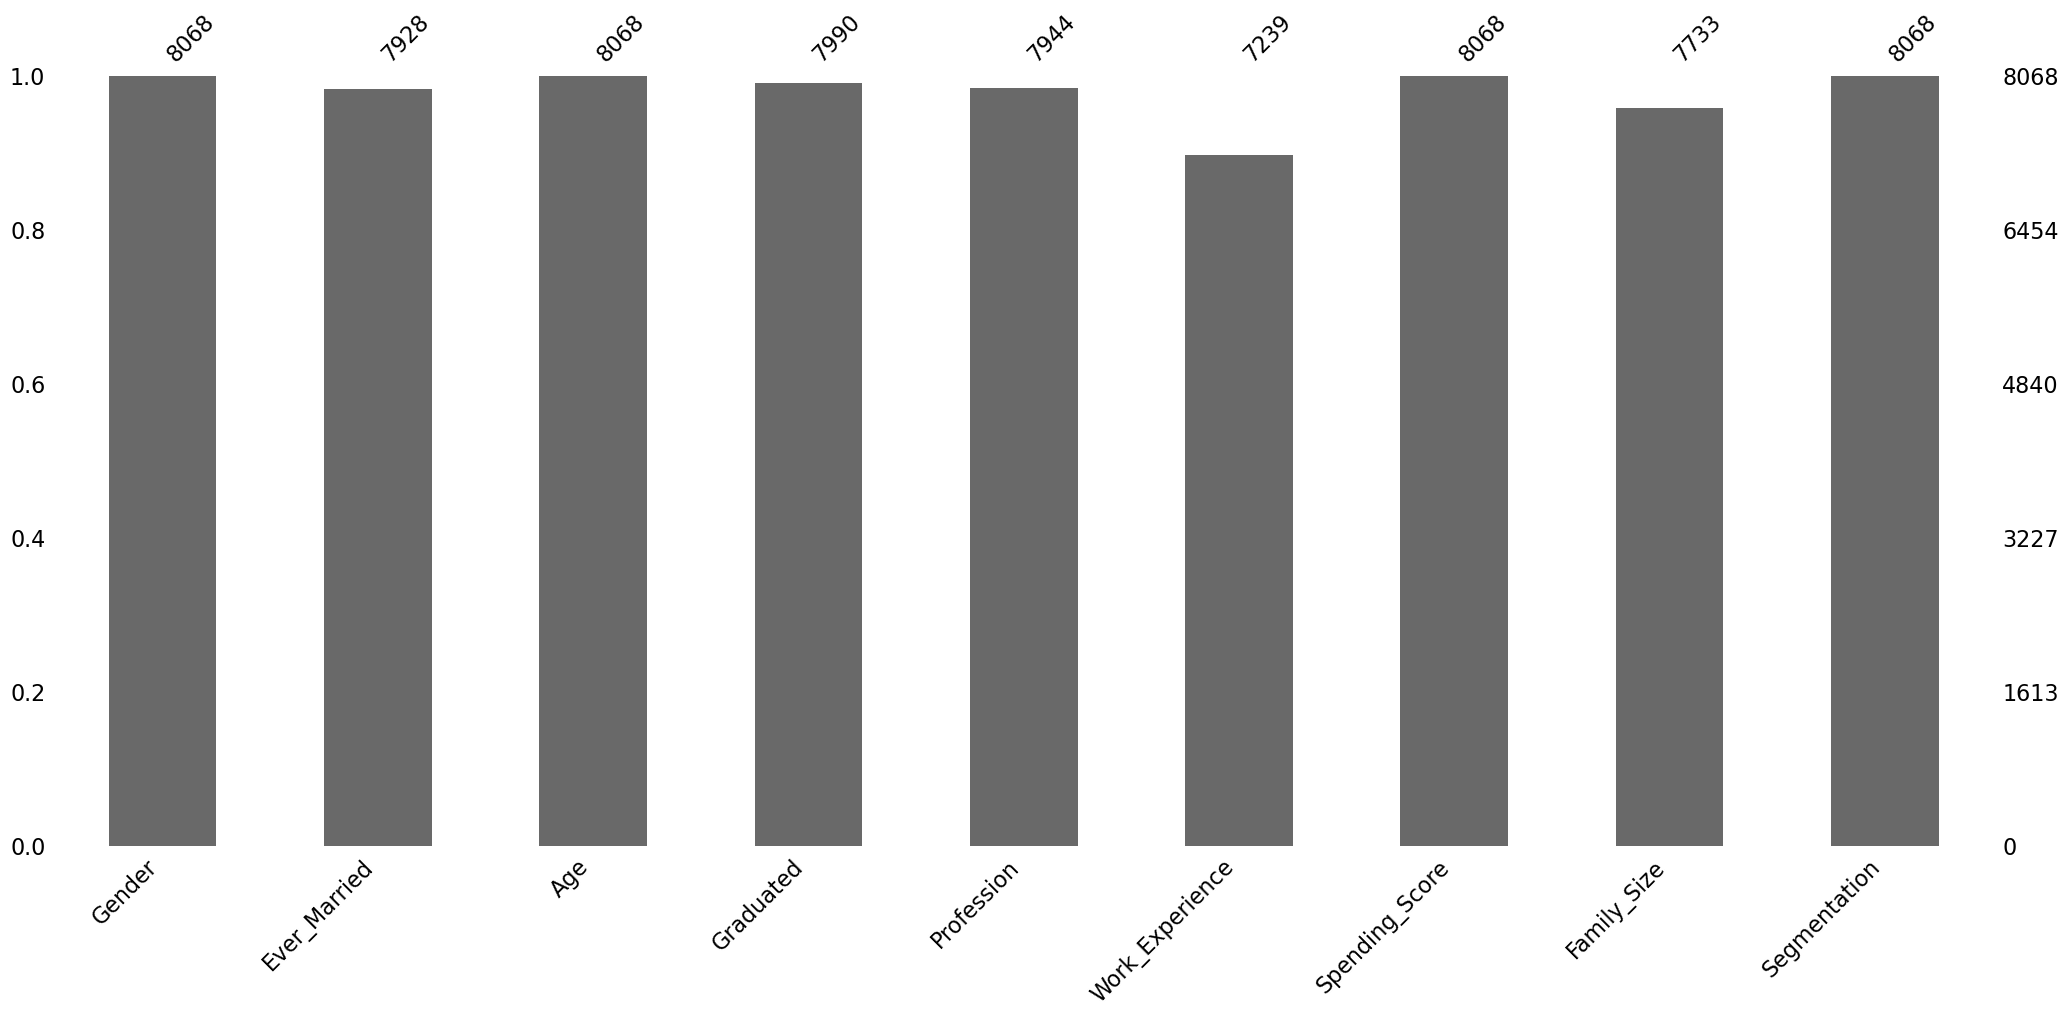

In [21]:
msno.bar(customer)

In [22]:
# Check for na values
customer.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

In [25]:
customer["Family_Size"].value_counts()

Family_Size
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: count, dtype: int64

In [27]:
# Explore frequency counts of categorical variables
for column in customer.select_dtypes(include = ["object"]):
  value_counts = customer.select_dtypes(include = ["object"])[column].value_counts()
  print(f"Value Counts for {column}:\n{value_counts}\n")

Value Counts for Gender:
Gender
Male      4417
Female    3651
Name: count, dtype: int64

Value Counts for Ever_Married:
Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64

Value Counts for Graduated:
Graduated
Yes    4968
No     3022
Name: count, dtype: int64

Value Counts for Profession:
Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

Value Counts for Spending_Score:
Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64

Value Counts for Segmentation:
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64



In [29]:
# Compute mode or median for columns
for column in customer.columns:
  if customer[column].dtypes == "object":
    print(f"Mode of {column}: {customer[column].mode()[0]}")
  elif customer[column].dtypes == "float64":
    print(f"Median of {column}: {customer[column].median()}")

Mode of Gender: Male
Mode of Ever_Married: Yes
Mode of Graduated: Yes
Mode of Profession: Artist
Median of Work_Experience: 1.0
Mode of Spending_Score: Low
Median of Family_Size: 3.0
Mode of Segmentation: D


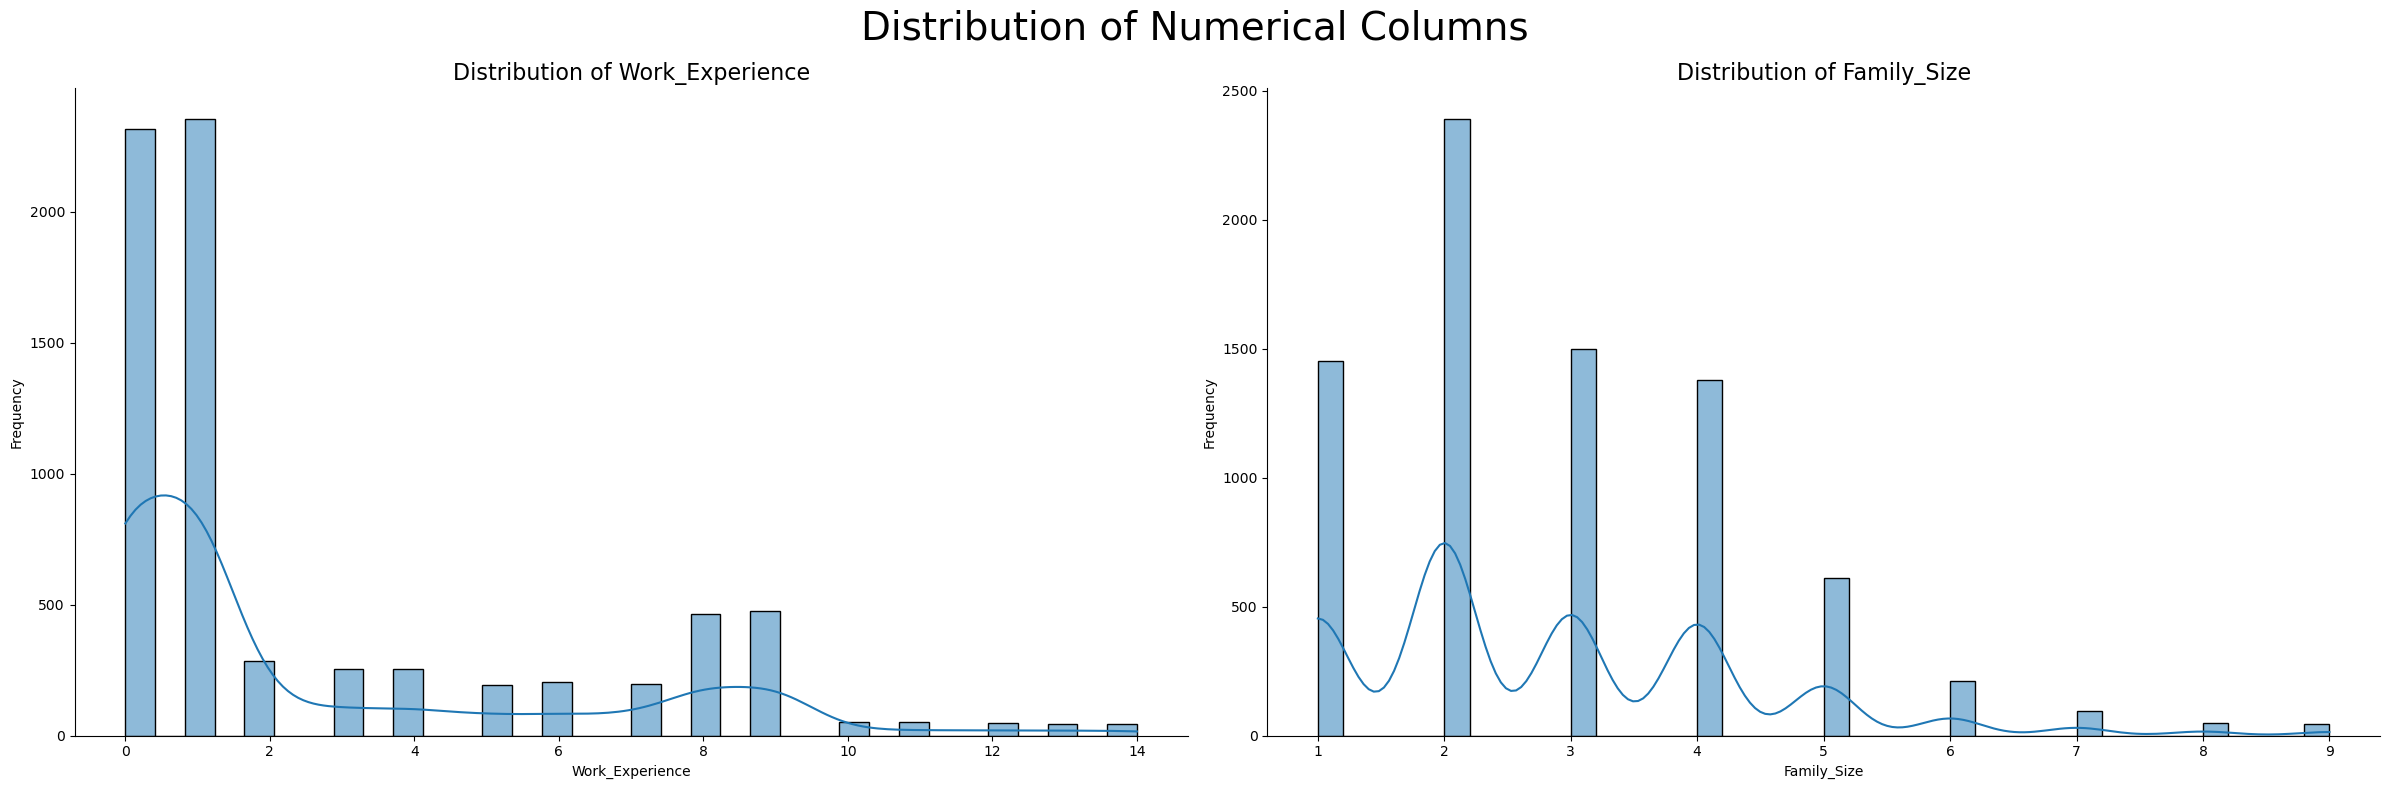

In [31]:
# Check if the numerical columns are skewed
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 8))
axes = axes.flatten()
fig.suptitle('Distribution of Numerical Columns', fontsize = 28)

for i, column in enumerate(customer[["Work_Experience", "Family_Size"]]):
    ax = axes[i]
    sns.histplot(customer[column], kde = True, ax = ax)
    ax.set_title(f'Distribution of {column}', fontsize = 16)
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Frequency')

sns.despine()
plt.tight_layout()
plt.show()

In [33]:
# Apply median imputation to handle missing values in numerical columns
for column in customer.columns:
    if customer[column].dtypes == "float64":
      customer[column].fillna(customer[column].median(), inplace = True)

/tmp/ipykernel_19090/120054260.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer[column].fillna(customer[column].median(), inplace = True)


In [35]:
# Apply mode imputation to handle missing values in categorical columns
for column in customer.columns:
    if customer[column].dtypes == "object":
      customer[column].fillna(customer[column].mode()[0], inplace = True)

/tmp/ipykernel_19090/2293185828.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer[column].fillna(customer[column].mode()[0], inplace = True)


In [37]:
customer.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [16]:
sorted(customer["Profession"].unique())

['Artist',
 'Doctor',
 'Engineer',
 'Entertainment',
 'Executive',
 'Healthcare',
 'Homemaker',
 'Lawyer',
 'Marketing']

In [17]:
for column in customer.select_dtypes(include = ["object"]):
  value_counts = customer.select_dtypes(include = ["object"])[column].value_counts()
  print(f"Value Counts for {column}:\n{value_counts}\n")

Value Counts for Gender:
Male      4417
Female    3651
Name: Gender, dtype: int64

Value Counts for Ever_Married:
Yes    4783
No     3285
Name: Ever_Married, dtype: int64

Value Counts for Graduated:
Yes    5046
No     3022
Name: Graduated, dtype: int64

Value Counts for Profession:
Artist           2640
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

Value Counts for Spending_Score:
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

Value Counts for Segmentation:
D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64



In [18]:
for column in customer.select_dtypes(include = ["object"]):
  unique_values = customer[column].unique()
  print(f"Unique Values for {column}:\n{unique_values}")

Unique Values for Gender:
['Male' 'Female']
Unique Values for Ever_Married:
['No' 'Yes']
Unique Values for Graduated:
['No' 'Yes']
Unique Values for Profession:
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']
Unique Values for Spending_Score:
['Low' 'Average' 'High']
Unique Values for Segmentation:
['D' 'A' 'B' 'C']


Categorical Variables:
\begin{equation}
\text{Gender} =
\begin{cases}
      0 & \text{if female} \\
      1 & \text{if male} \\
   \end{cases}
   \end{equation}
\
\begin{equation}
\text{Ever Married} =
\begin{cases}
      0 & \text{if no} \\
      1 & \text{if yes} \\
   \end{cases}
   \end{equation}
\
\begin{equation}
\text{Graduated} =
\begin{cases}
      0 & \text{if no} \\
      1 & \text{if yes} \\
   \end{cases}
   \end{equation}
\
\begin{equation}
\text{Profession} =
\begin{cases}
      0 & \text{if artist} \\
      1 & \text{if doctor} \\
      2 & \text{if engineer} \\
      3 & \text{if entertainment} \\
      4 & \text{if executive} \\
      5 & \text{if healthcare} \\
      6 & \text{if homemaker} \\
      7 & \text{if lawyer} \\
      8 & \text{if marketing} \\
   \end{cases}
   \end{equation}
\
\begin{equation}
\text{Work Experience} =
\begin{cases}
      0 & \text{if low} \\
      1 & \text{if average} \\
      2 & \text{if high} \\
   \end{cases}
   \end{equation}
\
\begin{equation}
\text{Segmentation} =
\begin{cases}
      0 & \text{if a} \\
      1 & \text{if b} \\
      2 & \text{if c} \\
      2 & \text{if d} \\
   \end{cases}
   \end{equation}

In [19]:
# Convert categorical variables into numerical variables
# Ordinal Columns
# Define mapping dictionaries
spending_mapping = {"Low": 0, "Average": 1, "High": 2}
customer["Spending_Score"] = customer["Spending_Score"].map(spending_mapping)

segmentation_mapping = {"A": 0, "B": 1, "C": 2, "D": 3}
customer["Segmentation"] = customer["Segmentation"].map(segmentation_mapping)

# Nominal Columns
label_encoder = LabelEncoder()

nominal_columns = customer[["Gender", "Ever_Married", "Graduated", "Profession"]]

for column in customer.columns:
  if customer[column].dtypes == "object":
    customer[column] = label_encoder.fit_transform(customer[column])

In [20]:
customer["Work_Experience"] = customer["Work_Experience"].astype("int64")
customer["Family_Size"] = customer["Family_Size"].astype("int64")

In [21]:
for column in customer.columns:
  unique_values = customer[column].unique()
  print(f"Unique Values for {column}:\n{unique_values}")

Unique Values for Gender:
[1 0]
Unique Values for Ever_Married:
[0 1]
Unique Values for Age:
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Unique Values for Graduated:
[0 1]
Unique Values for Profession:
[5 2 7 3 0 4 1 6 8]
Unique Values for Work_Experience:
[ 1  0  4  9 12  3 13  5  8 14  7  2  6 10 11]
Unique Values for Spending_Score:
[0 1 2]
Unique Values for Family_Size:
[4 3 1 2 6 5 8 7 9]
Unique Values for Segmentation:
[3 0 1 2]


In [22]:
customer.head()

Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0       1             0   22          0           5                1   
1       0             1   38          1           2                1   
2       0             1   67          1           2                1   
3       1             1   67          1           7                0   
4       0             1   40          1           3                1   

   Spending_Score  Family_Size  Segmentation  
0               0            4             3  
1               1            3             0  
2               0            1             1  
3               2            2             1  
4               2            6             0

In [23]:
# Examine the attributes and target variable
customer.describe()

Gender  Ever_Married          Age    Graduated   Profession  \
count  8068.000000   8068.000000  8068.000000  8068.000000  8068.000000   
mean      0.547471      0.592836    43.466906     0.625434     2.746901   
std       0.497772      0.491336    16.711696     0.484041     2.541418   
min       0.000000      0.000000    18.000000     0.000000     0.000000   
25%       0.000000      0.000000    30.000000     0.000000     0.000000   
50%       1.000000      1.000000    40.000000     1.000000     3.000000   
75%       1.000000      1.000000    53.000000     1.000000     5.000000   
max       1.000000      1.000000    89.000000     1.000000     8.000000   

       Work_Experience  Spending_Score  Family_Size  Segmentation  
count      8068.000000     8068.000000  8068.000000   8068.000000  
mean          2.472980        0.546108     2.856346      1.561973  
std           3.265248        0.741202     1.499577      1.139029  
min           0.000000        0.000000     1.000000      0.000000  
25%           0.000000        0.000000     2.000000      1.000000  
50%           1.000000        0.000000     3.000000      2.000000  
75%           4.000000        1.000000     4.000000      3.000000  
max          14.000000        2.000000     9.000000      3.000000

In [24]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           8068 non-null   int64
 1   Ever_Married     8068 non-null   int64
 2   Age              8068 non-null   int64
 3   Graduated        8068 non-null   int64
 4   Profession       8068 non-null   int64
 5   Work_Experience  8068 non-null   int64
 6   Spending_Score   8068 non-null   int64
 7   Family_Size      8068 non-null   int64
 8   Segmentation     8068 non-null   int64
dtypes: int64(9)
memory usage: 567.4 KB


In [25]:
customer_attributes = customer.drop("Segmentation", axis = 1)
customer_target = customer["Segmentation"]

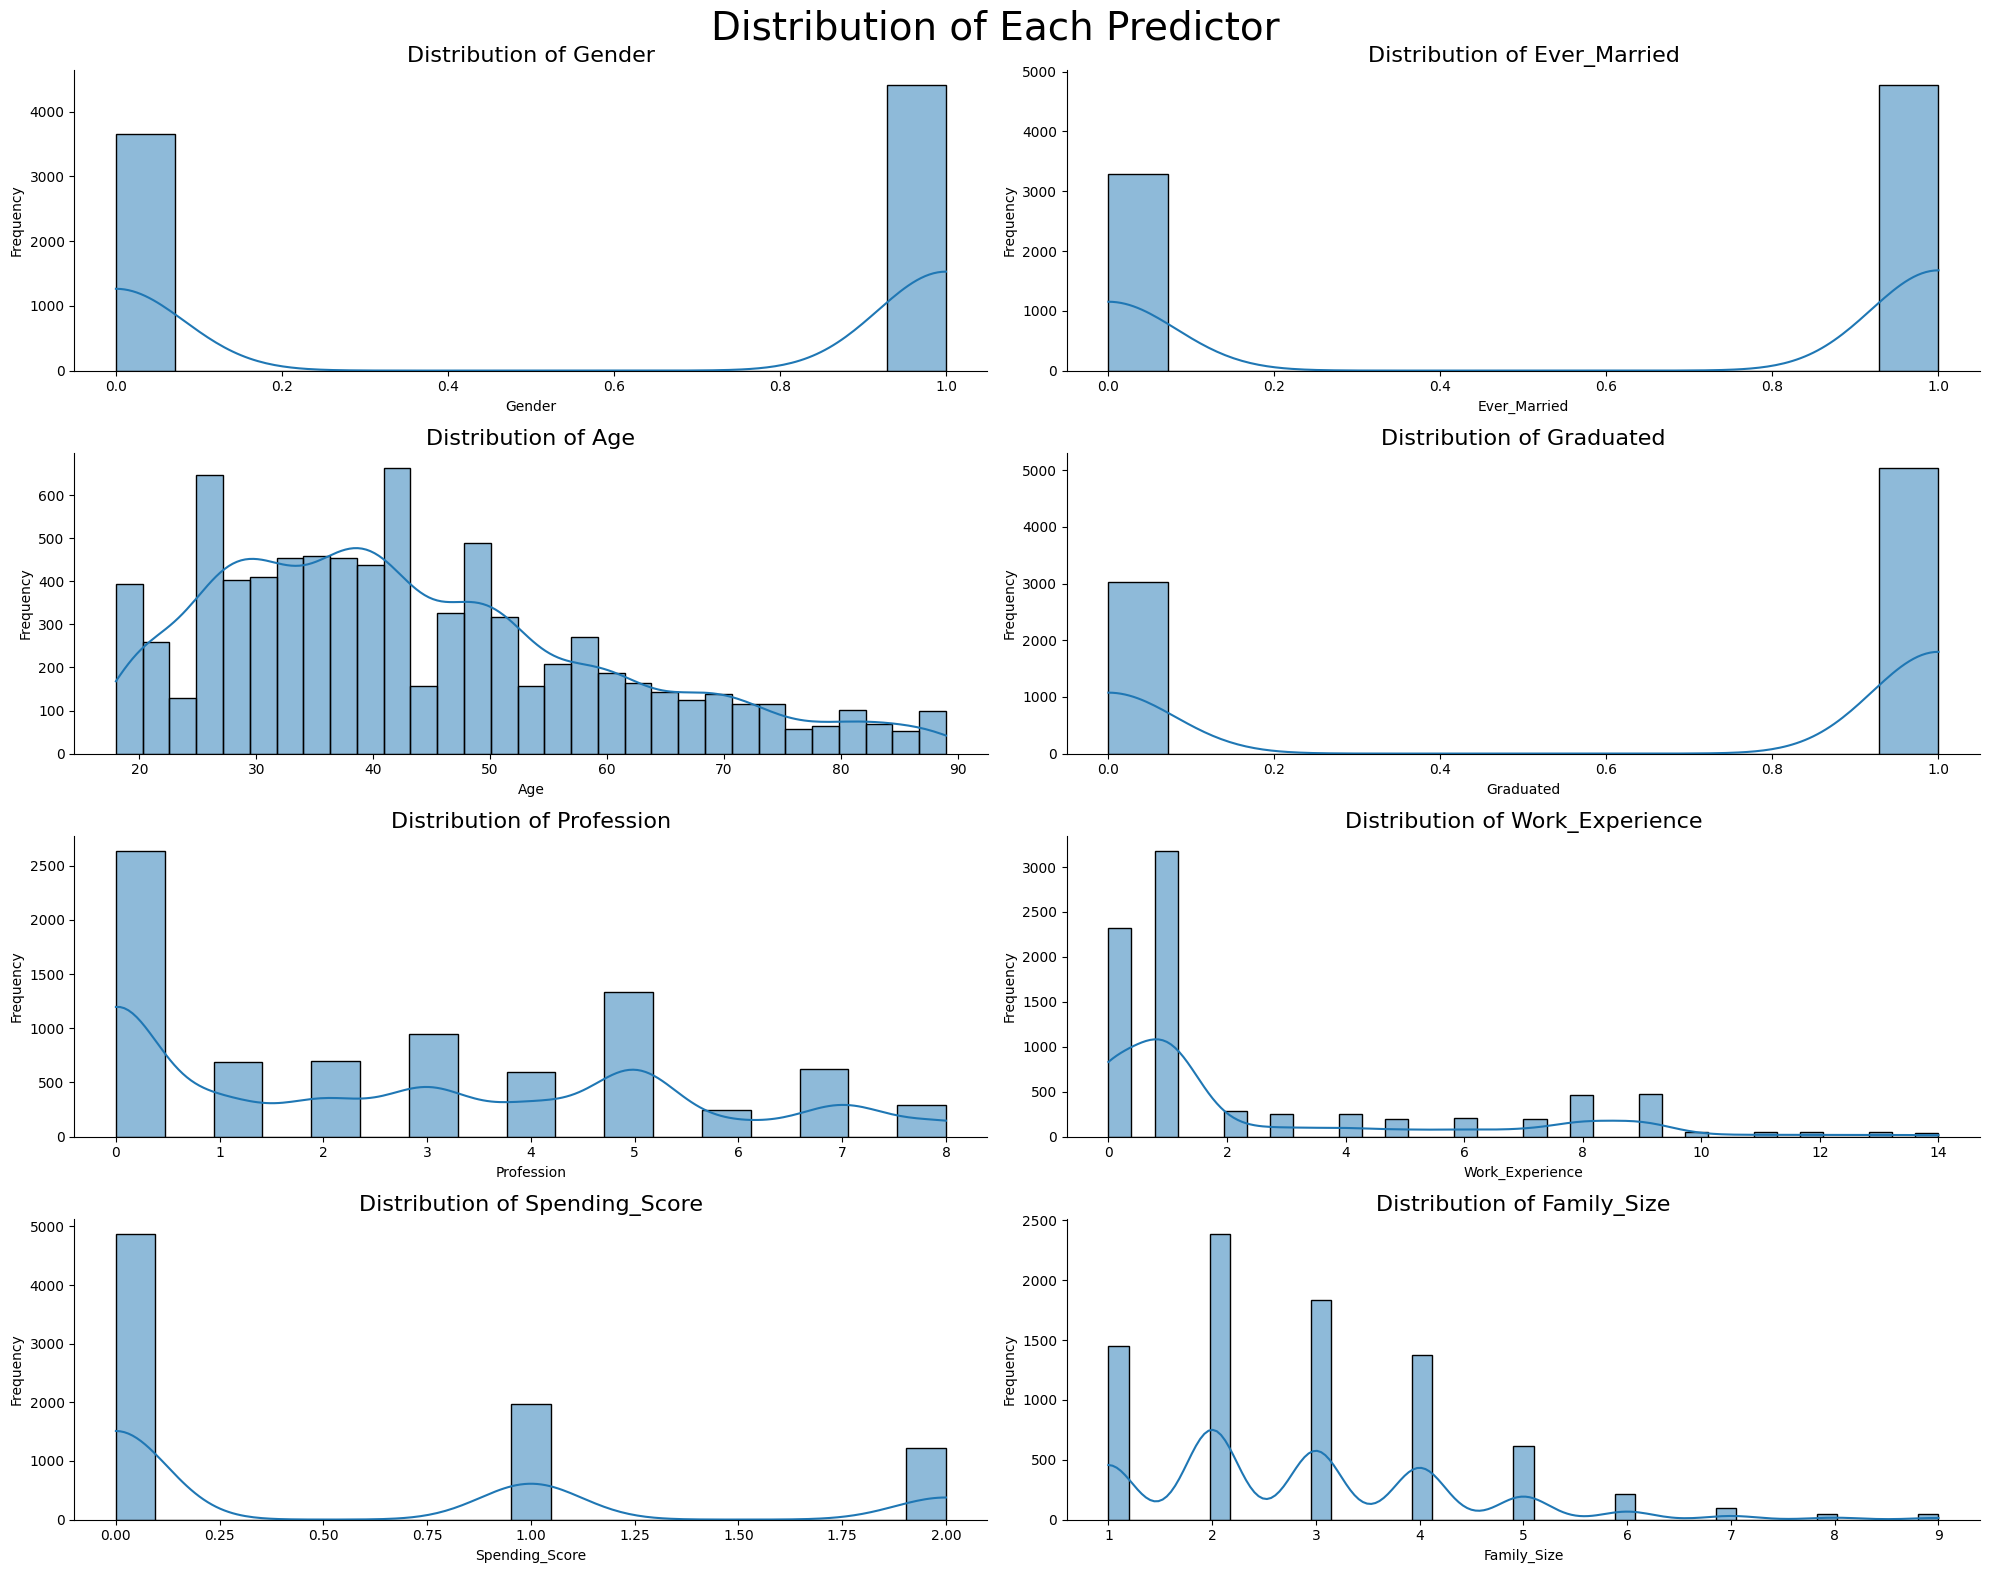

In [26]:
# Check if the attributes are normally distributed
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 16))
axes = axes.flatten()
fig.suptitle('Distribution of Each Predictor', fontsize = 28)

for i, column in enumerate(customer_attributes.columns):
    ax = axes[i]
    sns.histplot(customer_attributes[column], kde = True, ax = ax)
    ax.set_title(f'Distribution of {column}', fontsize = 16)
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Frequency')

sns.despine()
plt.tight_layout()
plt.show()

In [27]:
# Standardize the attributes
standardize_scaler = StandardScaler()

standardized_data = standardize_scaler.fit_transform(customer_attributes)

customer_standardized = pd.DataFrame(data = standardized_data, columns = customer_attributes.columns)

In [28]:
customer_standardized.describe()

Gender  Ever_Married           Age     Graduated    Profession  \
count  8.068000e+03  8.068000e+03  8.068000e+03  8.068000e+03  8.068000e+03   
mean   3.610839e-17  1.937524e-17  6.340986e-17 -4.403463e-18  4.931878e-17   
std    1.000062e+00  1.000062e+00  1.000062e+00  1.000062e+00  1.000062e+00   
min   -1.099912e+00 -1.206653e+00 -1.523992e+00 -1.292190e+00 -1.080921e+00   
25%   -1.099912e+00 -1.206653e+00 -8.058871e-01 -1.292190e+00 -1.080921e+00   
50%    9.091640e-01  8.287385e-01 -2.074667e-01  7.738800e-01  9.959573e-02   
75%    9.091640e-01  8.287385e-01  5.704798e-01  7.738800e-01  8.866068e-01   
max    9.091640e-01  8.287385e-01  2.724793e+00  7.738800e-01  2.067123e+00   

       Work_Experience  Spending_Score   Family_Size  
count     8.068000e+03    8.068000e+03  8.068000e+03  
mean     -4.139255e-17    4.755740e-17 -9.599549e-17  
std       1.000062e+00    1.000062e+00  1.000062e+00  
min      -7.574104e-01   -7.368331e-01 -1.237990e+00  
25%      -7.574104e-01   -7.368331e-01 -5.710940e-01  
50%      -4.511360e-01   -7.368331e-01  9.580227e-02  
75%       4.676873e-01    6.124110e-01  7.626985e-01  
max       3.530431e+00    1.961655e+00  4.097180e+00

In [29]:
# Check if the attributes have a mean of 0
customer_standardized.mean()

Gender             3.610839e-17
Ever_Married       1.937524e-17
Age                6.340986e-17
Graduated         -4.403463e-18
Profession         4.931878e-17
Work_Experience   -4.139255e-17
Spending_Score     4.755740e-17
Family_Size       -9.599549e-17
dtype: float64

In [30]:
# Check if the attributes have a variance of 1
customer_standardized.var()

Gender             1.000124
Ever_Married       1.000124
Age                1.000124
Graduated          1.000124
Profession         1.000124
Work_Experience    1.000124
Spending_Score     1.000124
Family_Size        1.000124
dtype: float64

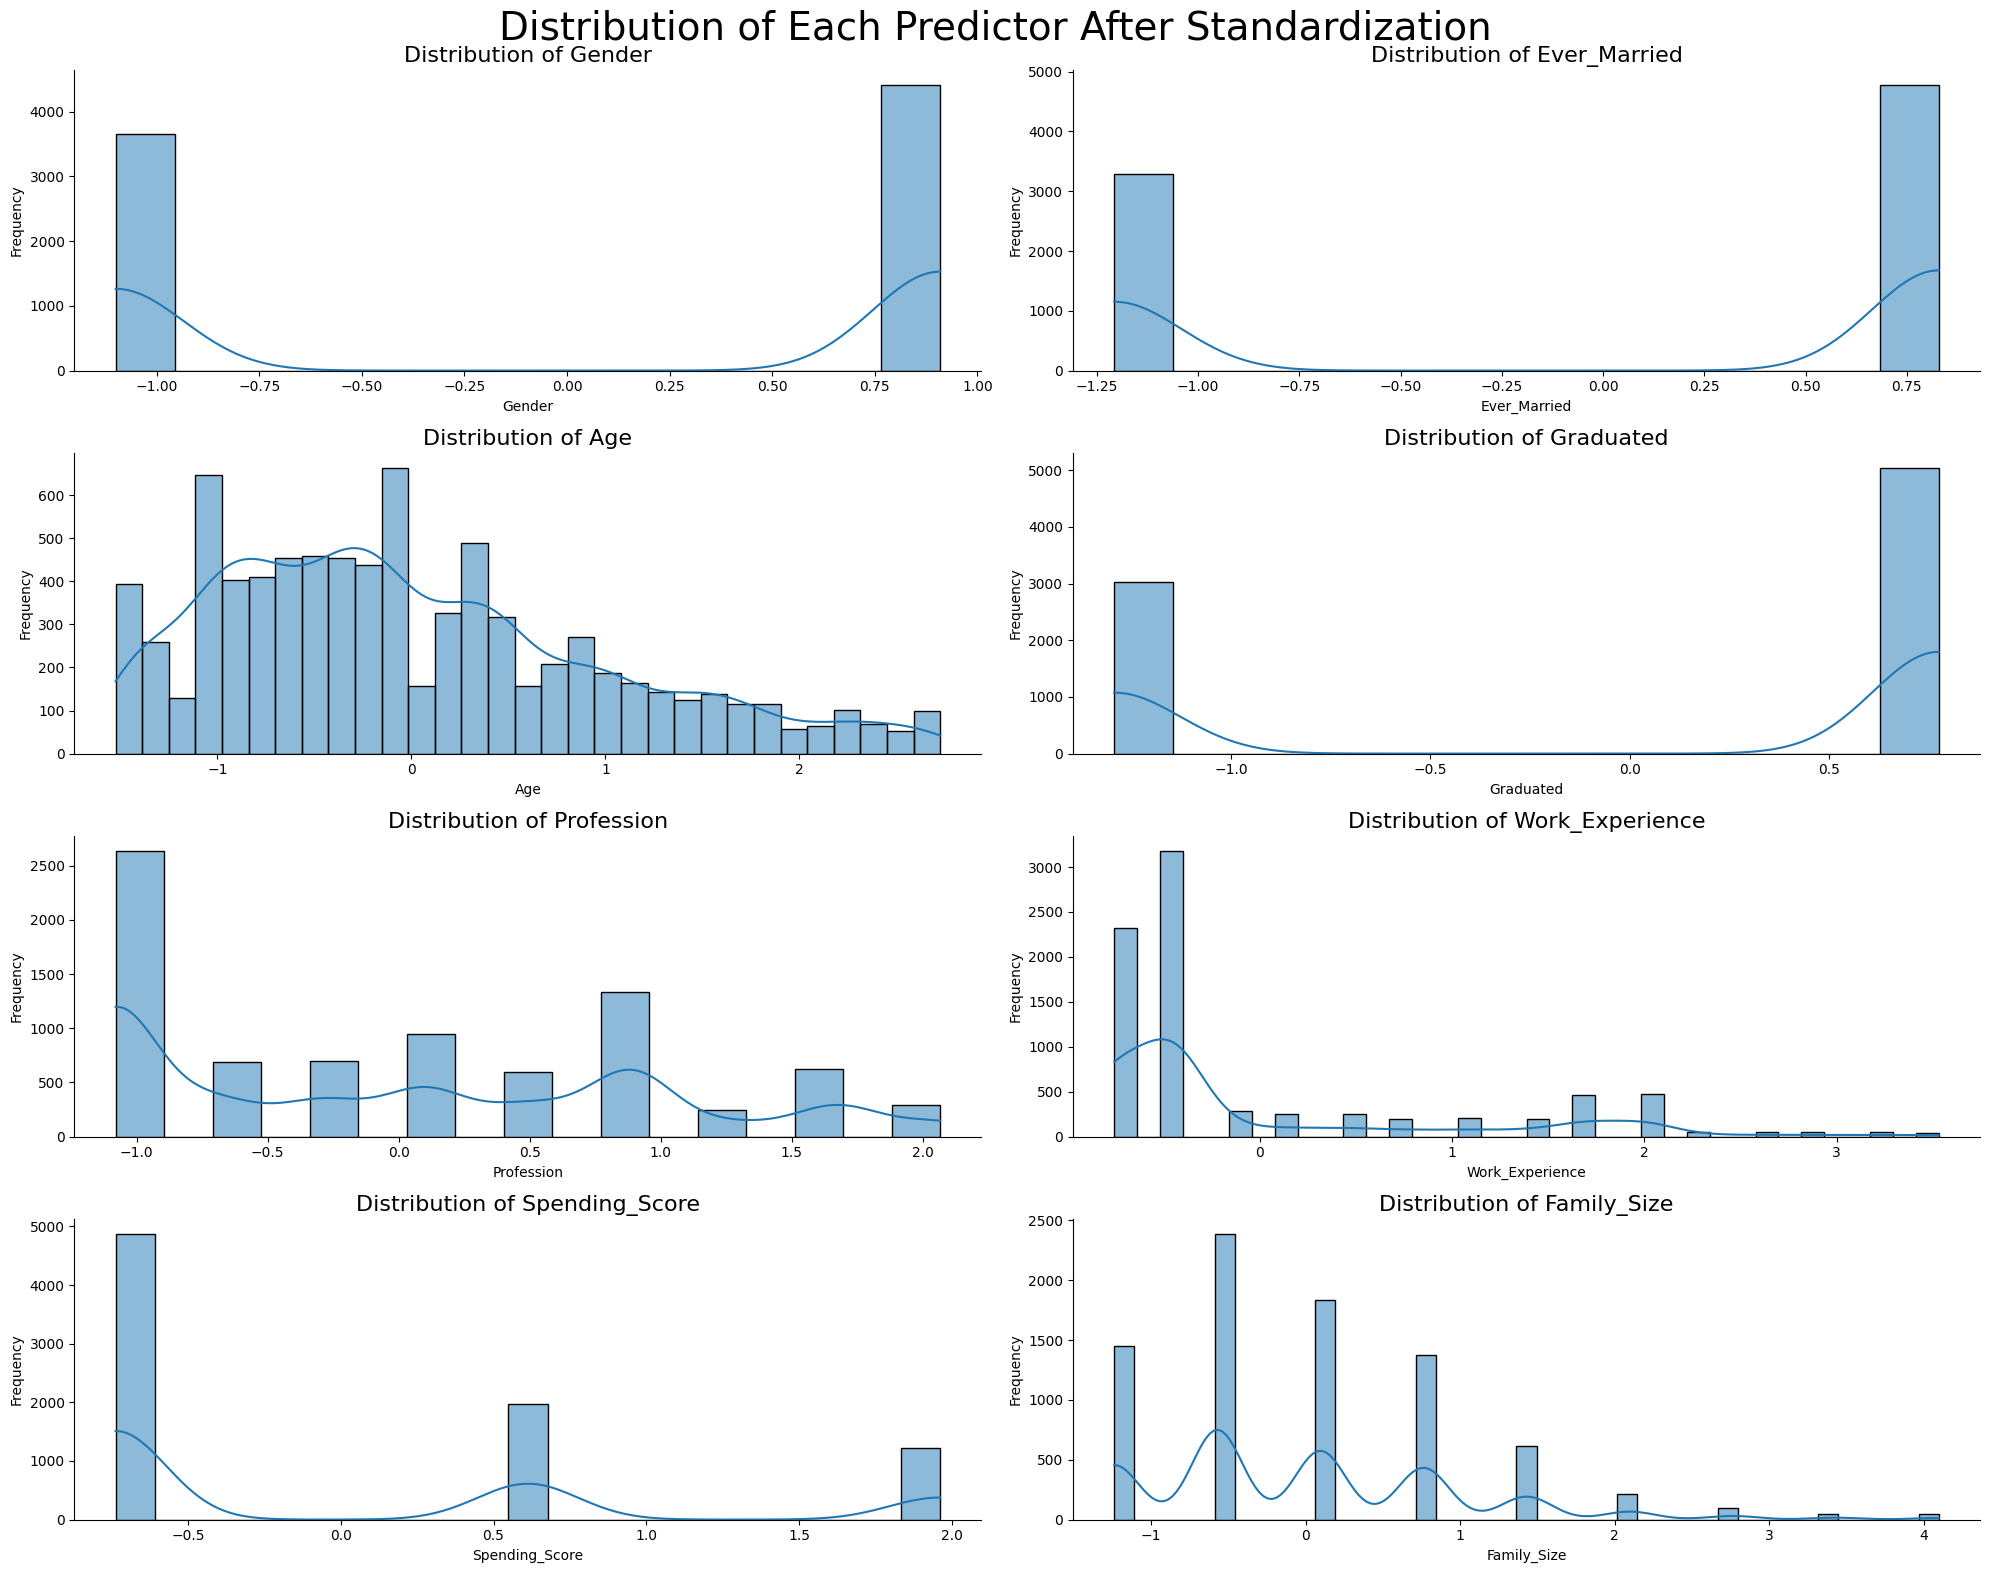

In [31]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 16))
axes = axes.flatten()
fig.suptitle('Distribution of Each Predictor After Standardization', fontsize = 28)

for i, column in enumerate(customer_standardized.columns):
    ax = axes[i]
    sns.histplot(customer_standardized[column], kde = True, ax = ax)
    ax.set_title(f'Distribution of {column}', fontsize = 16)
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Frequency')

sns.despine()
plt.tight_layout()
plt.show()

In [32]:
# Normalize the attributes
normalize_scaler = MinMaxScaler()

normalized_data = normalize_scaler.fit_transform(customer_standardized)

customer_transformed = pd.DataFrame(data = normalized_data, columns = customer_attributes.columns)

In [33]:
customer_transformed.describe()

Gender  Ever_Married          Age    Graduated   Profession  \
count  8068.000000   8068.000000  8068.000000  8068.000000  8068.000000   
mean      0.547471      0.592836     0.358689     0.625434     0.343363   
std       0.497772      0.491336     0.235376     0.484041     0.317677   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.000000      0.000000     0.169014     0.000000     0.000000   
50%       1.000000      1.000000     0.309859     1.000000     0.375000   
75%       1.000000      1.000000     0.492958     1.000000     0.625000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

       Work_Experience  Spending_Score  Family_Size  
count      8068.000000     8068.000000  8068.000000  
mean          0.176641        0.273054     0.232043  
std           0.233232        0.370601     0.187447  
min           0.000000        0.000000     0.000000  
25%           0.000000        0.000000     0.125000  
50%           0.071429        0.000000     0.250000  
75%           0.285714        0.500000     0.375000  
max           1.000000        1.000000     1.000000

In [34]:
# Check if the attributes have a minimum of 0
customer_transformed.min()

Gender             0.0
Ever_Married       0.0
Age                0.0
Graduated          0.0
Profession         0.0
Work_Experience    0.0
Spending_Score     0.0
Family_Size        0.0
dtype: float64

In [35]:
# Check if the attributes have a maximum of 1
customer_transformed.max()

Gender             1.0
Ever_Married       1.0
Age                1.0
Graduated          1.0
Profession         1.0
Work_Experience    1.0
Spending_Score     1.0
Family_Size        1.0
dtype: float64

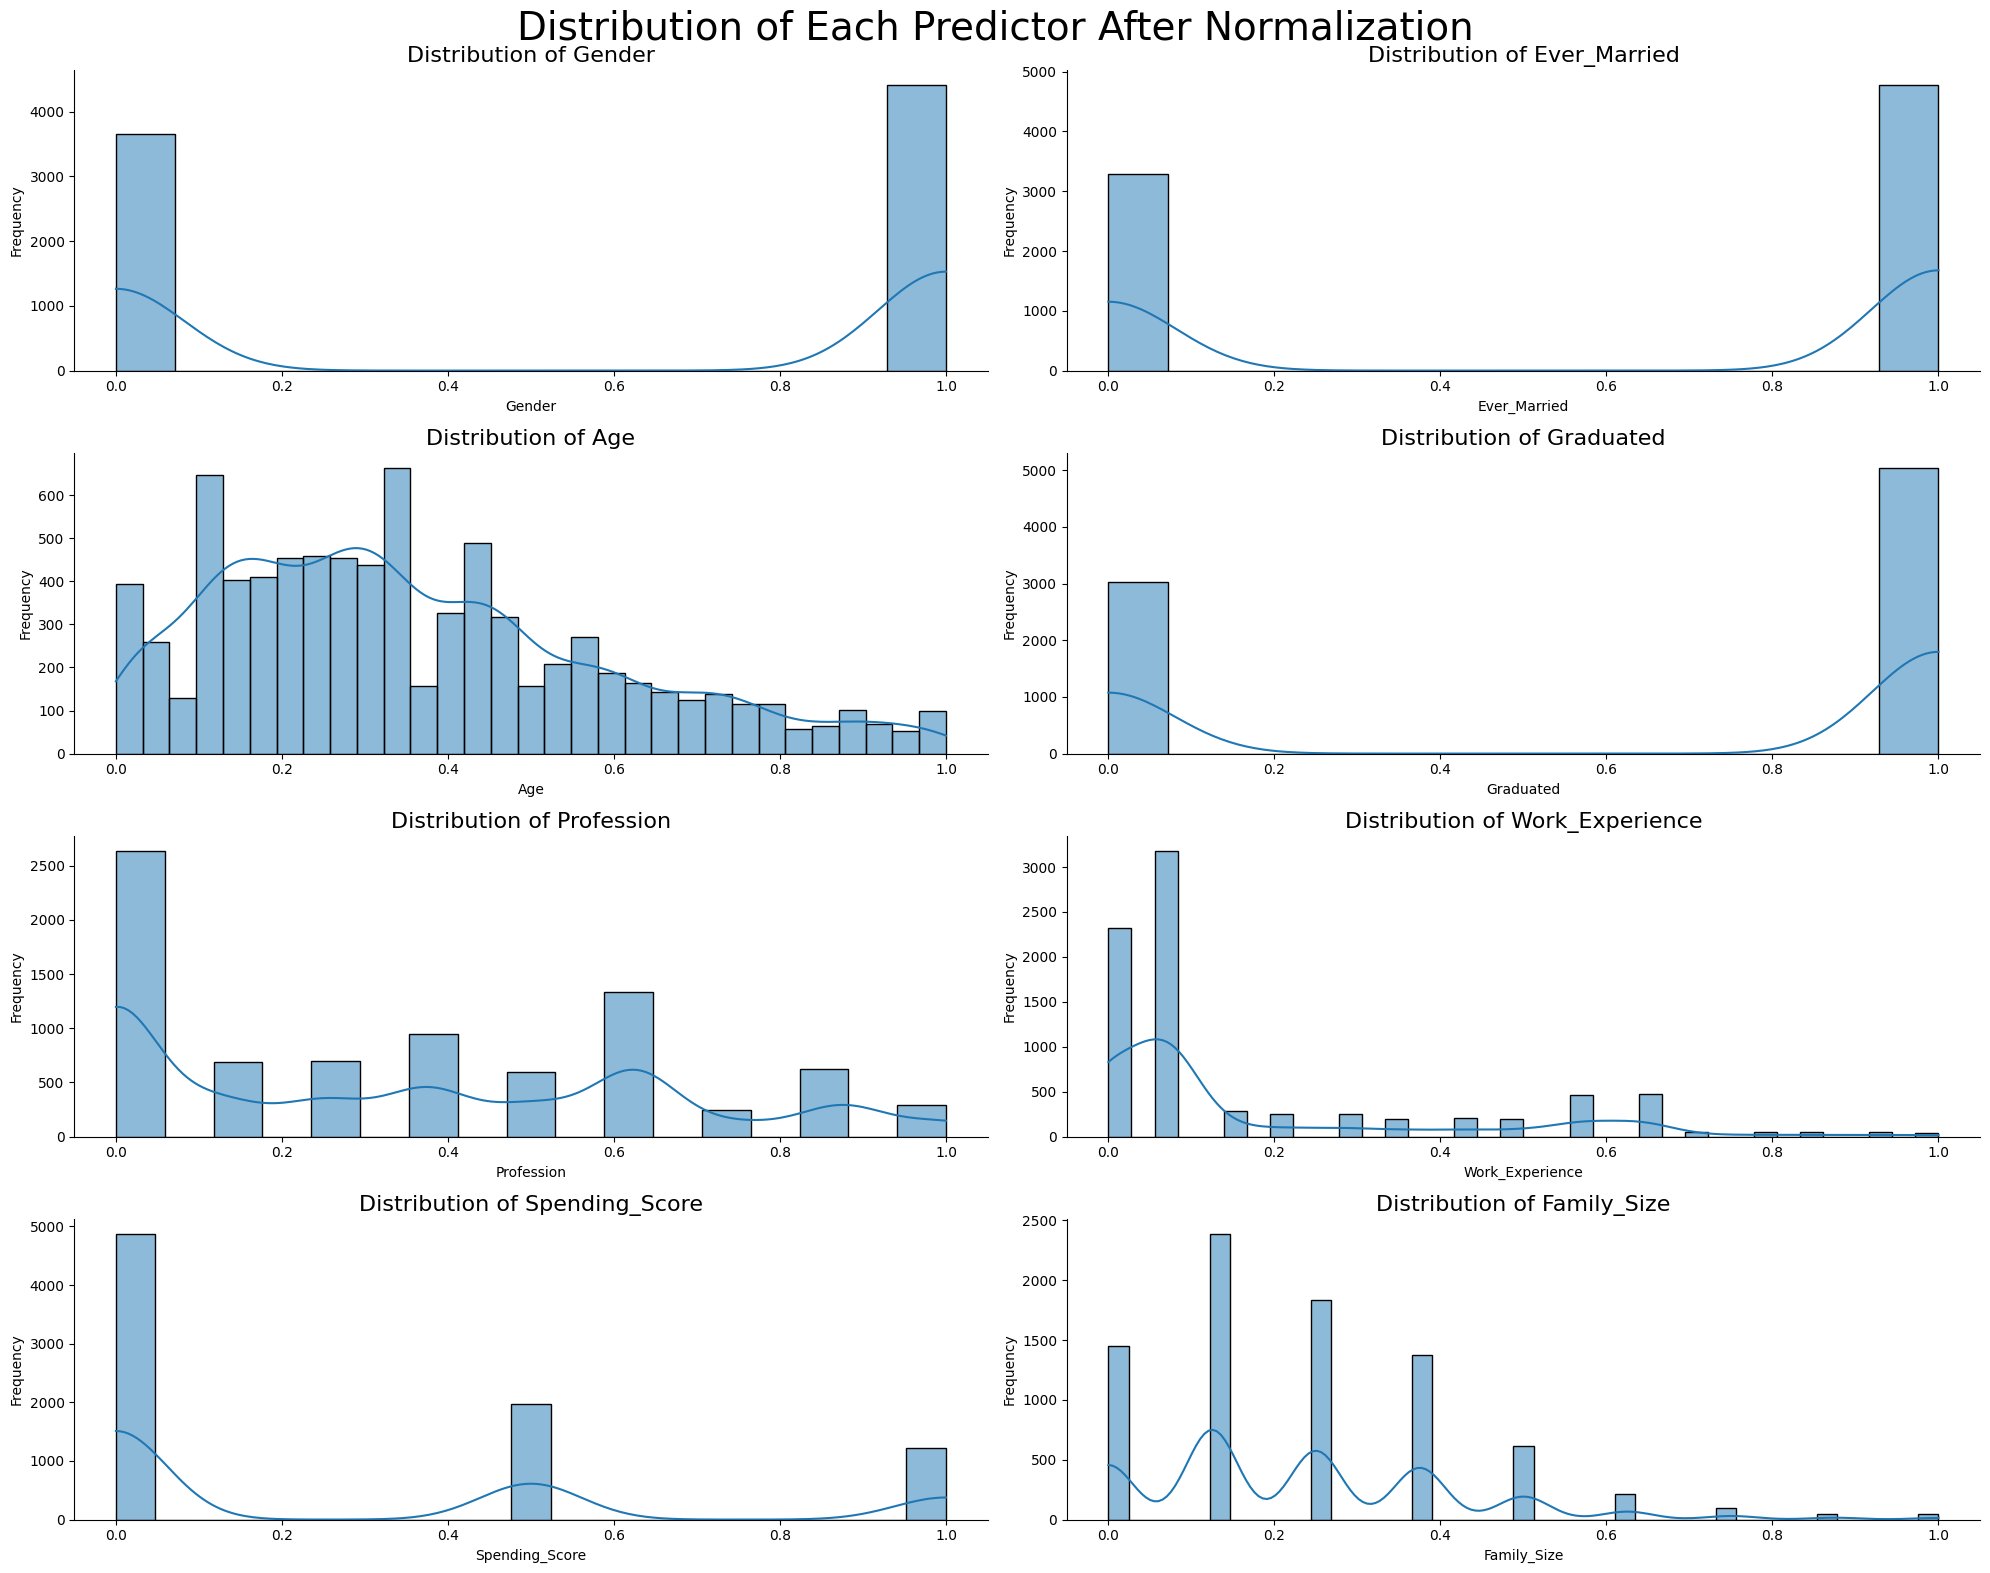

In [36]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 16))
axes = axes.flatten()
fig.suptitle('Distribution of Each Predictor After Normalization', fontsize = 28)

for i, column in enumerate(customer_transformed.columns):
    ax = axes[i]
    sns.histplot(customer_transformed[column], kde = True, ax = ax)
    ax.set_title(f'Distribution of {column}', fontsize = 16)
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Frequency')

sns.despine()
plt.tight_layout()
plt.show()

In [37]:
dataframe = pd.concat([customer_transformed, customer_target], axis = 1, join = "inner")

In [38]:
dataframe.head()

Gender  Ever_Married       Age  Graduated  Profession  Work_Experience  \
0     1.0           0.0  0.056338        0.0       0.625         0.071429   
1     0.0           1.0  0.281690        1.0       0.250         0.071429   
2     0.0           1.0  0.690141        1.0       0.250         0.071429   
3     1.0           1.0  0.690141        1.0       0.875         0.000000   
4     0.0           1.0  0.309859        1.0       0.375         0.071429   

   Spending_Score  Family_Size  Segmentation  
0             0.0        0.375             3  
1             0.5        0.250             0  
2             0.0        0.000             1  
3             1.0        0.125             1  
4             1.0        0.625             0

In [39]:
dataframe.describe()

Gender  Ever_Married          Age    Graduated   Profession  \
count  8068.000000   8068.000000  8068.000000  8068.000000  8068.000000   
mean      0.547471      0.592836     0.358689     0.625434     0.343363   
std       0.497772      0.491336     0.235376     0.484041     0.317677   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.000000      0.000000     0.169014     0.000000     0.000000   
50%       1.000000      1.000000     0.309859     1.000000     0.375000   
75%       1.000000      1.000000     0.492958     1.000000     0.625000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

       Work_Experience  Spending_Score  Family_Size  Segmentation  
count      8068.000000     8068.000000  8068.000000   8068.000000  
mean          0.176641        0.273054     0.232043      1.561973  
std           0.233232        0.370601     0.187447      1.139029  
min           0.000000        0.000000     0.000000      0.000000  
25%           0.000000        0.000000     0.125000      1.000000  
50%           0.071429        0.000000     0.250000      2.000000  
75%           0.285714        0.500000     0.375000      3.000000  
max           1.000000        1.000000     1.000000      3.000000

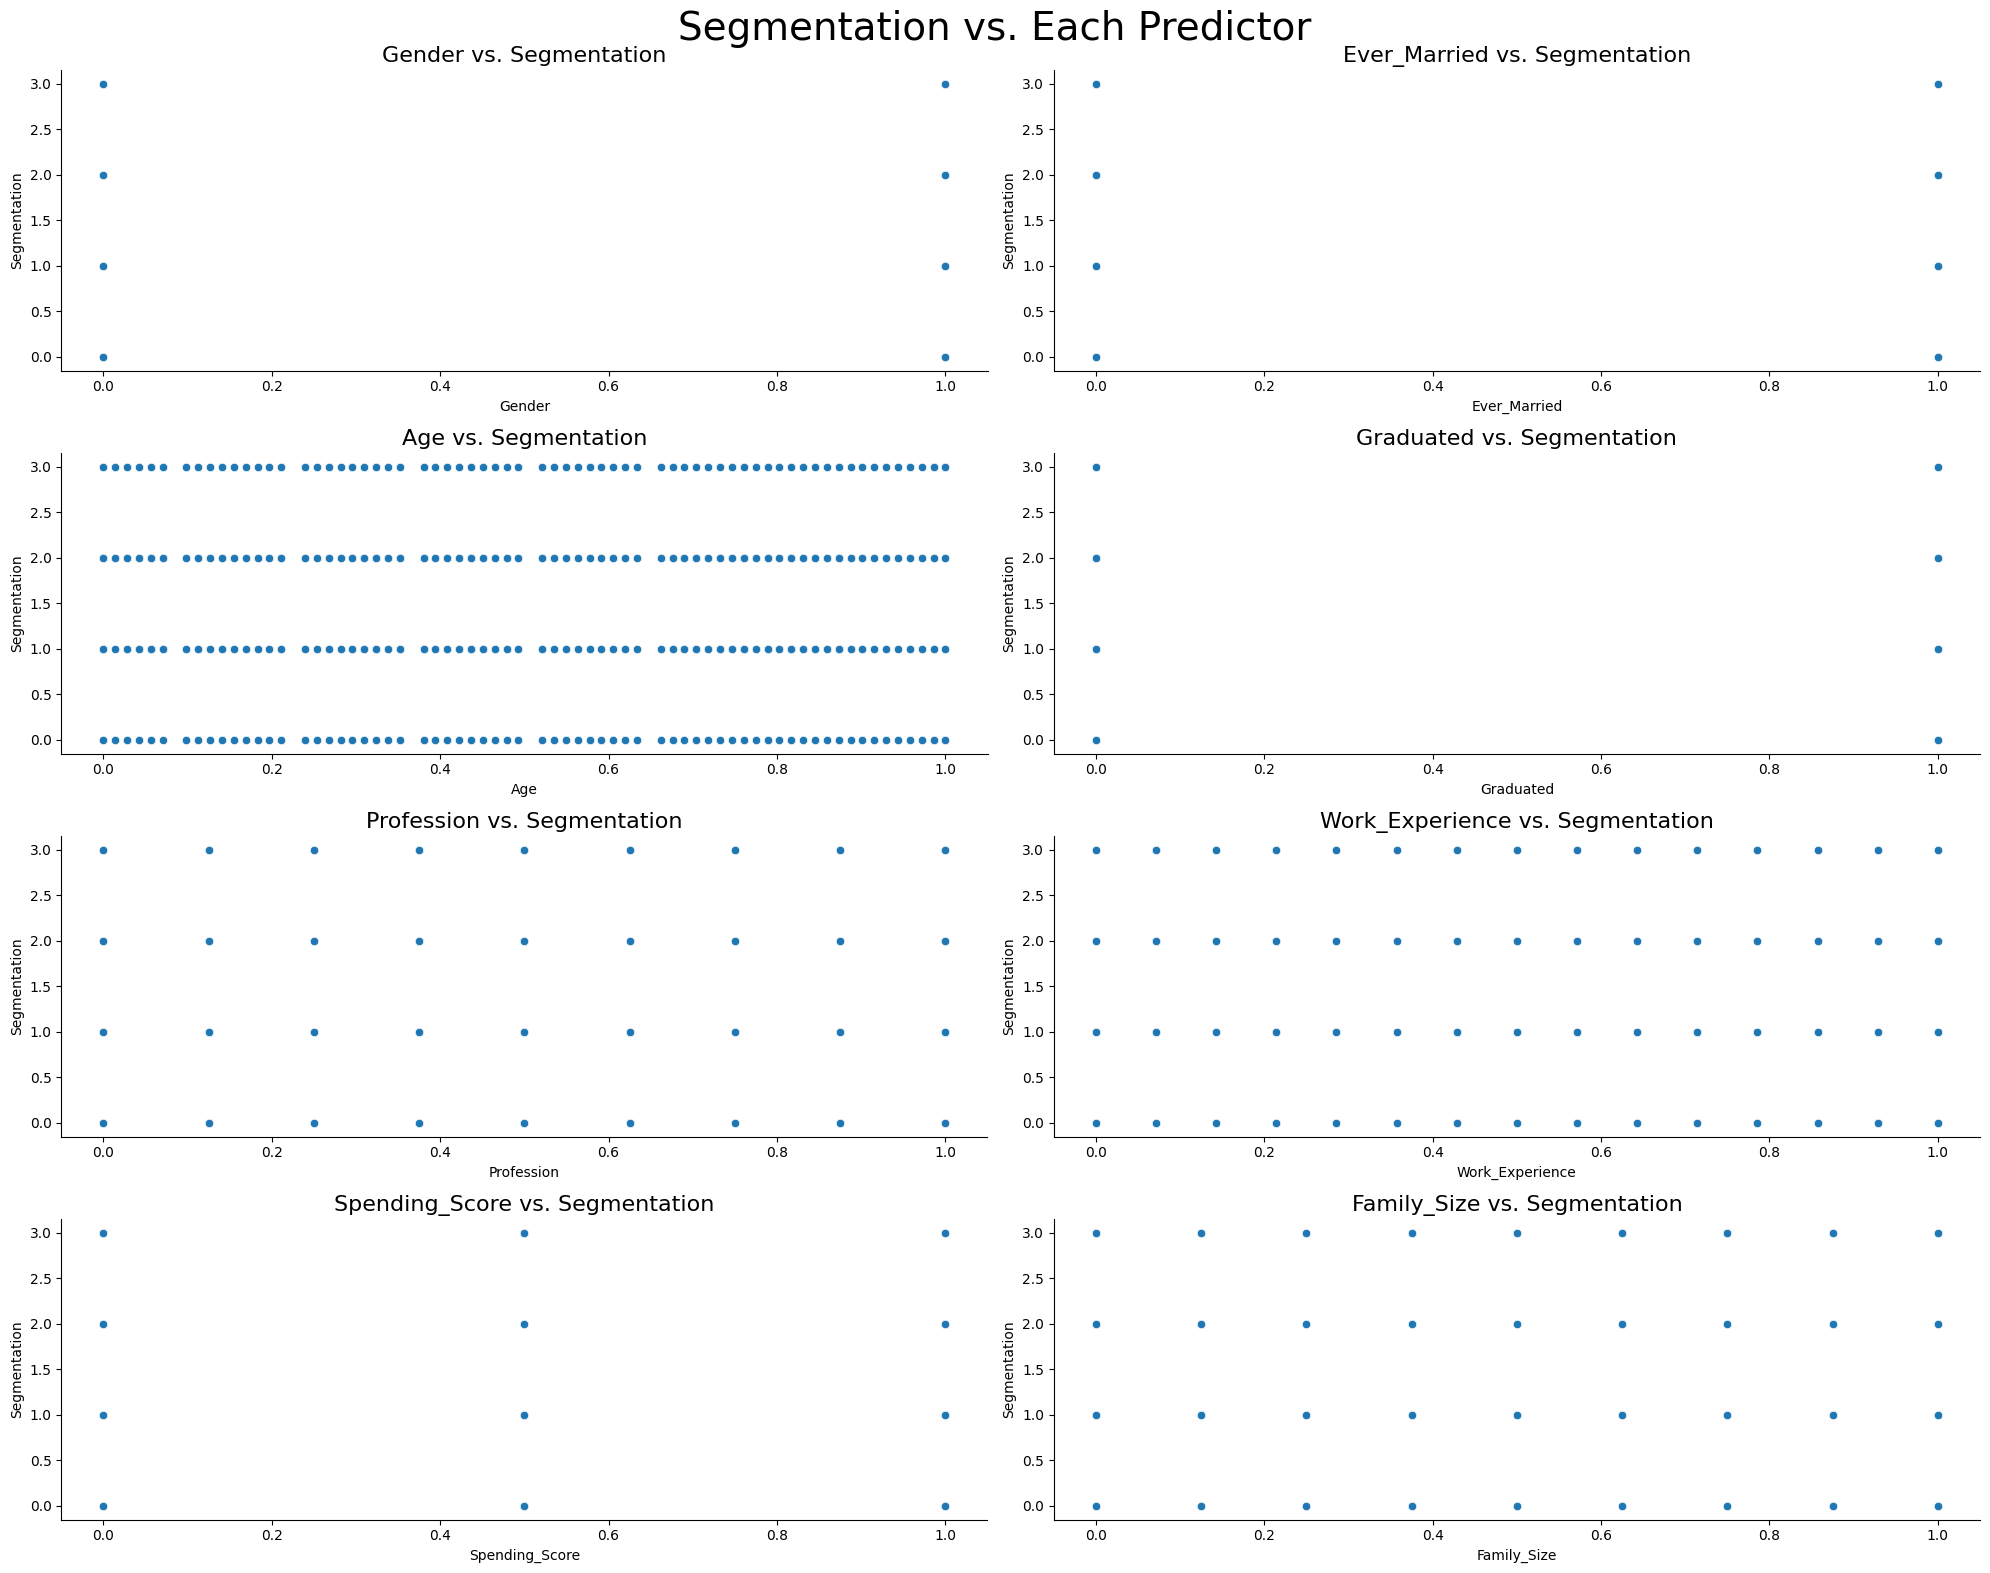

In [40]:
# Plot to see how each of the predictors are correlated to the target variable
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 16))
axes = axes.flatten()
fig.suptitle('Segmentation vs. Each Predictor', fontsize = 28)

dataframe_predictors = ["Gender", "Ever_Married", "Age", "Graduated", "Profession", "Work_Experience", "Spending_Score", "Family_Size"]
dataframe_target = "Segmentation"

for i, column in enumerate(dataframe_predictors):
    ax = axes[i]
    sns.scatterplot(data = dataframe, x = column, y = dataframe_target, ax = ax)
    ax.set_title(f'{column} vs. {dataframe_target}', fontsize = 16)
    ax.set_xlabel(column)
    ax.set_ylabel(dataframe_target)

sns.despine()
plt.tight_layout()
plt.show()

In [41]:
dataframe.corr()["Segmentation"]

Gender             0.026403
Ever_Married      -0.213730
Age               -0.243552
Graduated         -0.178683
Profession         0.202919
Work_Experience    0.008216
Spending_Score    -0.109837
Family_Size        0.191476
Segmentation       1.000000
Name: Segmentation, dtype: float64

<Axes: >

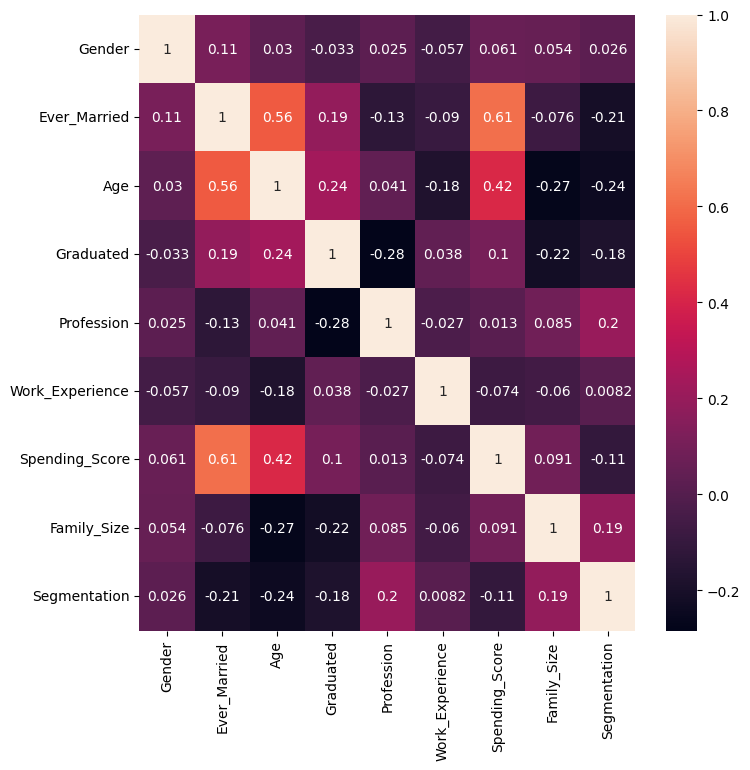

In [42]:
# Correlation Matrix
plt.figure(figsize = (8, 8))
sns.heatmap(dataframe.corr(), annot = True)

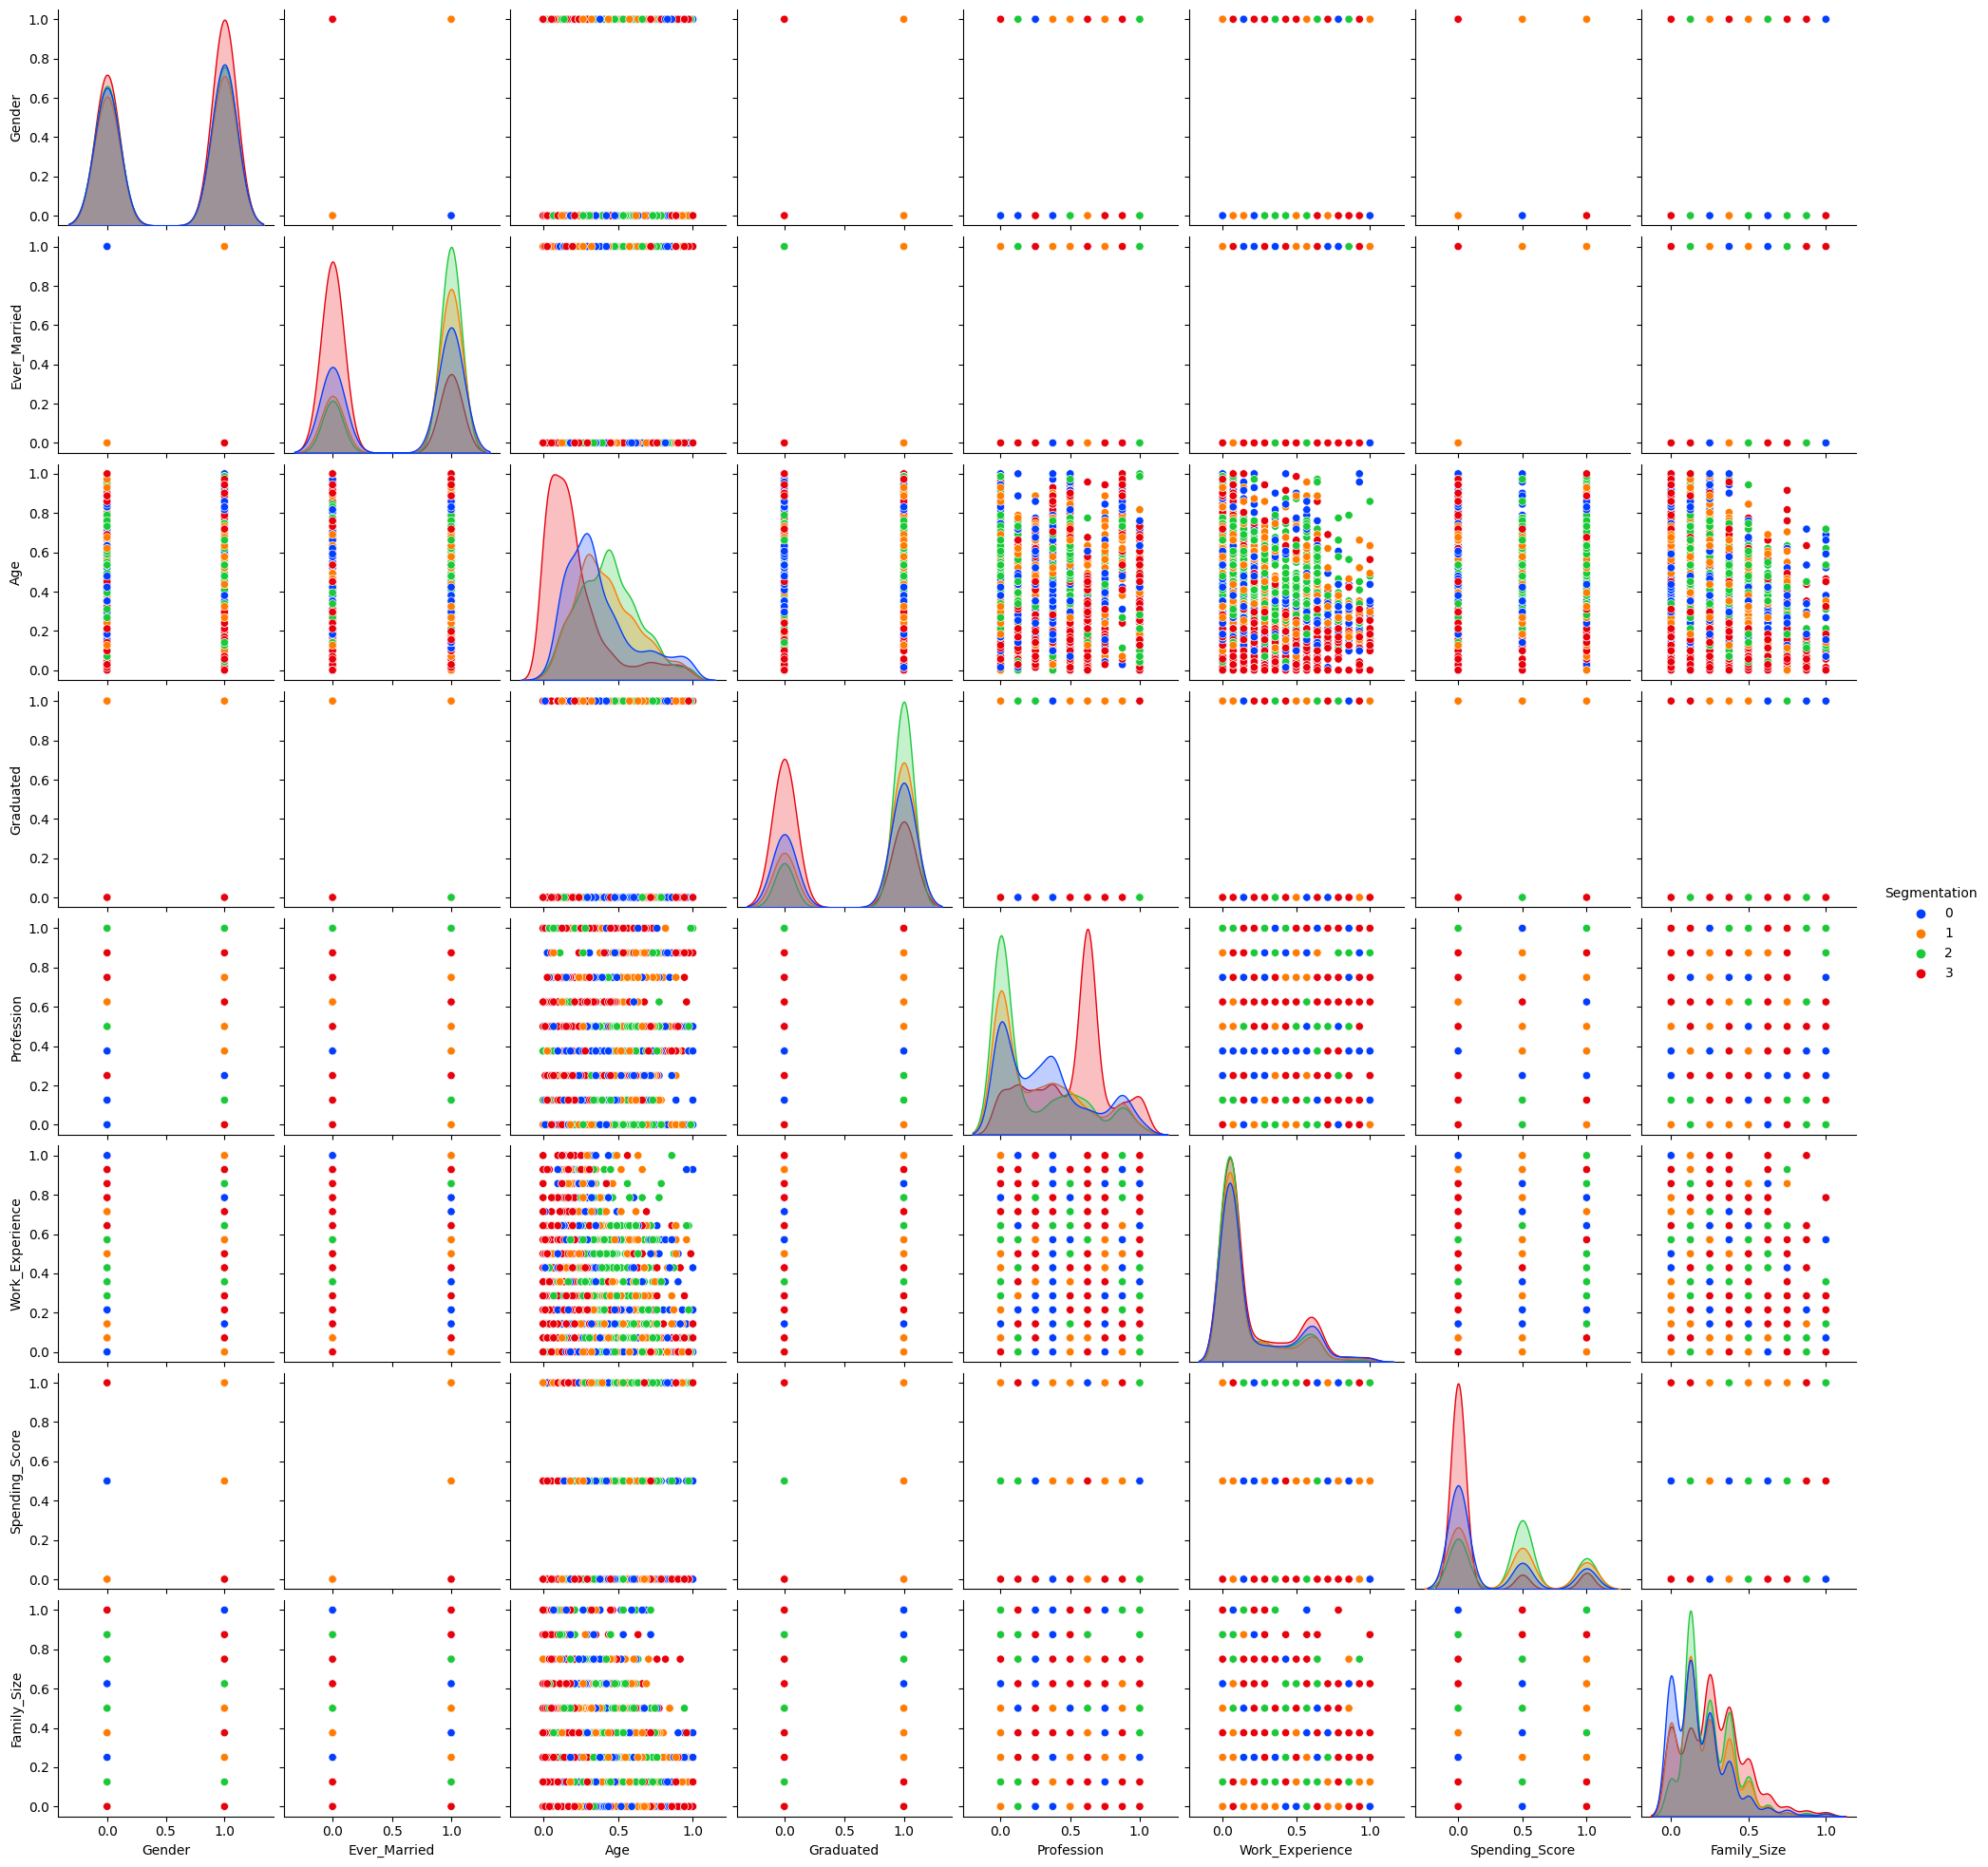

In [43]:
# Pairplot
sns.pairplot(data = dataframe, hue = "Segmentation", palette = "bright")

In [44]:
# Define predictor variables and target variable
X = dataframe.drop("Segmentation", axis = 1, inplace = False)
y = dataframe["Segmentation"]

In [45]:
# Split data into training and test splits
X_train, X_test, y_train , y_test = train_test_split(X, y,  test_size = 0.3, random_state = 101)

# Models

Note: After Grid Search Cross Validation (GridSearchCV) was performed on all 4 of the models and the optimal hyperparameters were determined, the code to fit the models and print out the best parameters and estimator were commented out due to the computational complexity in fitting the GridSearchCV model.

## Plain Decision Tree Classifier

In [46]:
# Baseline Performance
dt_initial = DecisionTreeClassifier(random_state = 101)

In [47]:
dt_initial = dt_initial.fit(X_train, y_train)

In [48]:
dt_initial.get_depth()

27

In [49]:
dt_initial_predict = dt_initial.predict(X_test)

In [50]:
# Grid Search CV
dt_parameters = {'criterion': ["gini", "entropy"],
              'max_depth': np.arange(1, 27).tolist(),
              'max_features': np.arange(1, 8).tolist()}

In [51]:
dt_gridsearch = GridSearchCV(estimator = dt_initial, param_grid = dt_parameters, cv = 5, n_jobs = 1)

In [52]:
# dt_gridsearch.fit(X_train, y_train)

In [53]:
# dt_gridsearch.best_params_

In [54]:
# dt_gridsearch.best_estimator_

In [55]:
dt_final = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, max_features = 6, random_state = 101)

In [56]:
dt_final = dt_final.fit(X_train, y_train)

In [57]:
dt_final_predict = dt_final.predict(X_test)

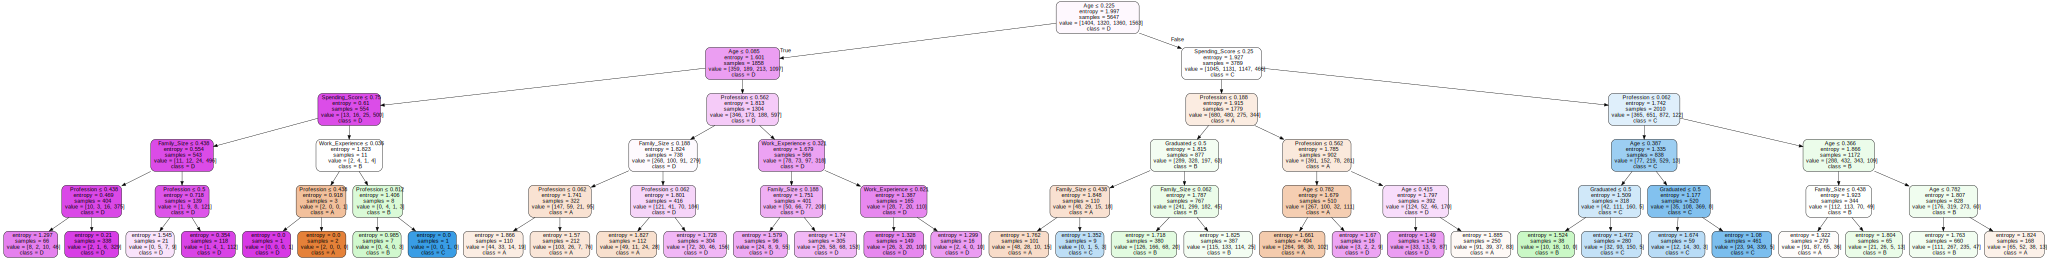

In [58]:
# Visualize the Decision Tree
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt_final, out_file = None, feature_names = customer_transformed.columns, class_names = ["A", "B", "C", "D"],
                                filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [59]:
# Export the Decision Tree
"""
graph.format = "png"
graph.render("DecisionTree")
"""

'\ngraph.format = "png"\ngraph.render("DecisionTree")\n'

## Random Forest Classifier

In [60]:
# Baseline Performance
rf_initial = RandomForestClassifier(bootstrap = True, random_state = 101)

In [61]:
rf_initial = rf_initial.fit(X_train, y_train)

In [62]:
# Calculate the depth of each tree
rf_tree_depth = [tree.get_depth() for tree in rf_initial.estimators_]

In [63]:
np.max(rf_tree_depth)

31

In [64]:
rf_initial_predict = rf_initial.predict(X_test)

In [65]:
# Grid Search CV
rf_parameters = {'n_estimators': [60, 70, 80, 90, 100, 110, 120, 130],
                 'max_depth': [3, 5, 7],
                 'max_features': np.arange(1, 8).tolist()}

In [66]:
rf_gridsearch = GridSearchCV(estimator = rf_initial, param_grid = rf_parameters, cv = 5, n_jobs = 1)

In [67]:
# rf_gridsearch.fit(X_train, y_train)

In [68]:
# rf_gridsearch.best_params_

In [69]:
# rf_gridsearch.best_estimator_

In [70]:
rf_final = RandomForestClassifier(max_depth = 7, max_features = 2, n_estimators = 90, random_state = 101)

In [71]:
rf_final = rf_final.fit(X_train, y_train)

In [72]:
rf_final_predict = rf_final.predict(X_test)

## Adaboost Classifier

In [73]:
ada_initial = AdaBoostClassifier(random_state = 101)

In [74]:
ada_initial = ada_initial.fit(X_train, y_train)

In [75]:
ada_initial_predict = ada_initial.predict(X_test)

In [76]:
# Grid Search CV
ada_parameters = {'n_estimators': [10, 50, 100, 200, 300, 400, 500],
                  'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                  'algorithm': ['SAMME', 'SAMME.R']}

In [77]:
ada_gridsearch = GridSearchCV(estimator = ada_initial, param_grid = ada_parameters, cv = 5, n_jobs = 1)

In [78]:
# ada_gridsearch.fit(X_train, y_train)

In [79]:
# ada_gridsearch.best_params_

In [80]:
# ada_gridsearch.best_estimator_

In [81]:
ada_final = AdaBoostClassifier(learning_rate = 0.15, n_estimators = 500, random_state = 101)

In [82]:
ada_final = ada_final.fit(X_train, y_train)

In [83]:
ada_final_predict = ada_final.predict(X_test)

## XGBoost Classifier

In [84]:
xg_initial = XGBClassifier(random_state = 101)

In [85]:
xg_initial = xg_initial.fit(X_train, y_train)

In [86]:
xg_initial_predict = xg_initial.predict(X_test)

In [87]:
xg_parameters = {'n_estimators': [50, 100, 200, 300, 400],
                 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                 'max_depth': np.arange(3, 10).tolist()}

In [88]:
xg_gridsearch = GridSearchCV(estimator = xg_initial, param_grid = xg_parameters, cv = 5, n_jobs = 1)

In [89]:
# xg_gridsearch.fit(X_train, y_train)

In [90]:
# xg_gridsearch.best_params_

In [91]:
# xg_gridsearch.best_estimator_

In [92]:
xg_final = XGBClassifier(learning_rate = 0.2, max_depth = 3, n_estimators = 50)

In [93]:
xg_final = xg_final.fit(X_train, y_train)

In [94]:
xg_final_predict = xg_final.predict(X_test)

# Results Analysis

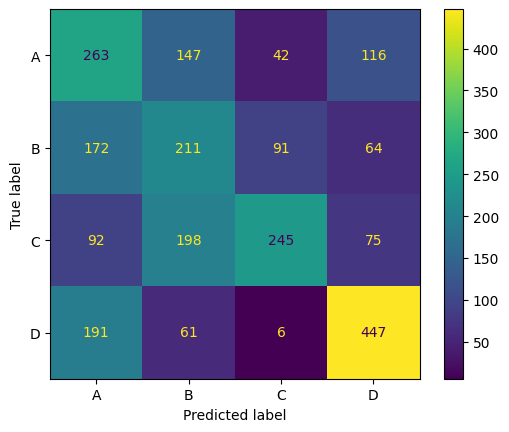

In [95]:
dt_confusion_matrix = confusion_matrix(y_test, dt_final_predict)
dt_cmd_obj = ConfusionMatrixDisplay(dt_confusion_matrix, display_labels = ["A", "B", "C", "D"])
dt_cmd_obj.plot()
plt.show()

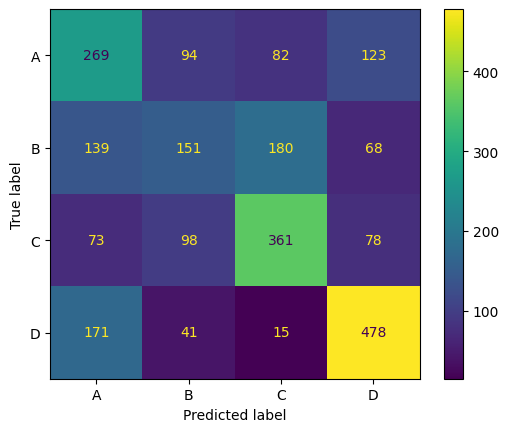

In [96]:
rf_confusion_matrix = confusion_matrix(y_test, rf_final_predict)
rf_cmd_obj = ConfusionMatrixDisplay(rf_confusion_matrix, display_labels = ["A", "B", "C", "D"])
rf_cmd_obj.plot()
plt.show()

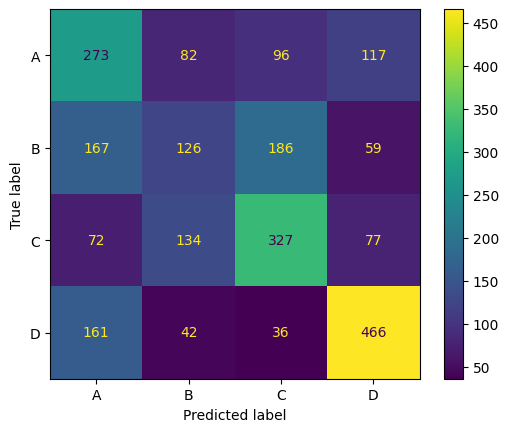

In [97]:
ada_confusion_matrix = confusion_matrix(y_test, ada_final_predict)
ada_cmd_obj = ConfusionMatrixDisplay(ada_confusion_matrix, display_labels = ["A", "B", "C", "D"])
ada_cmd_obj.plot()
plt.show()

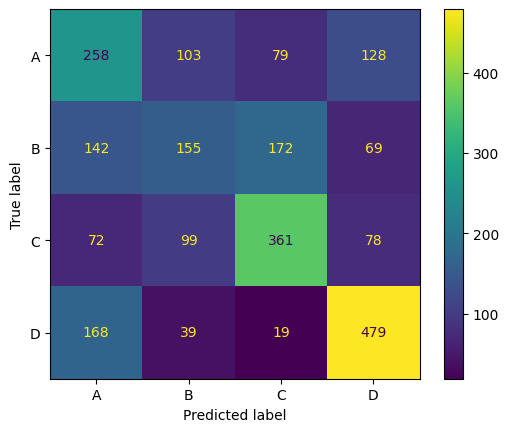

In [98]:
xg_confusion_matrix = confusion_matrix(y_test, xg_final_predict)
xg_cmd_obj = ConfusionMatrixDisplay(xg_confusion_matrix, display_labels = ["A", "B", "C", "D"])
xg_cmd_obj.plot()
plt.show()

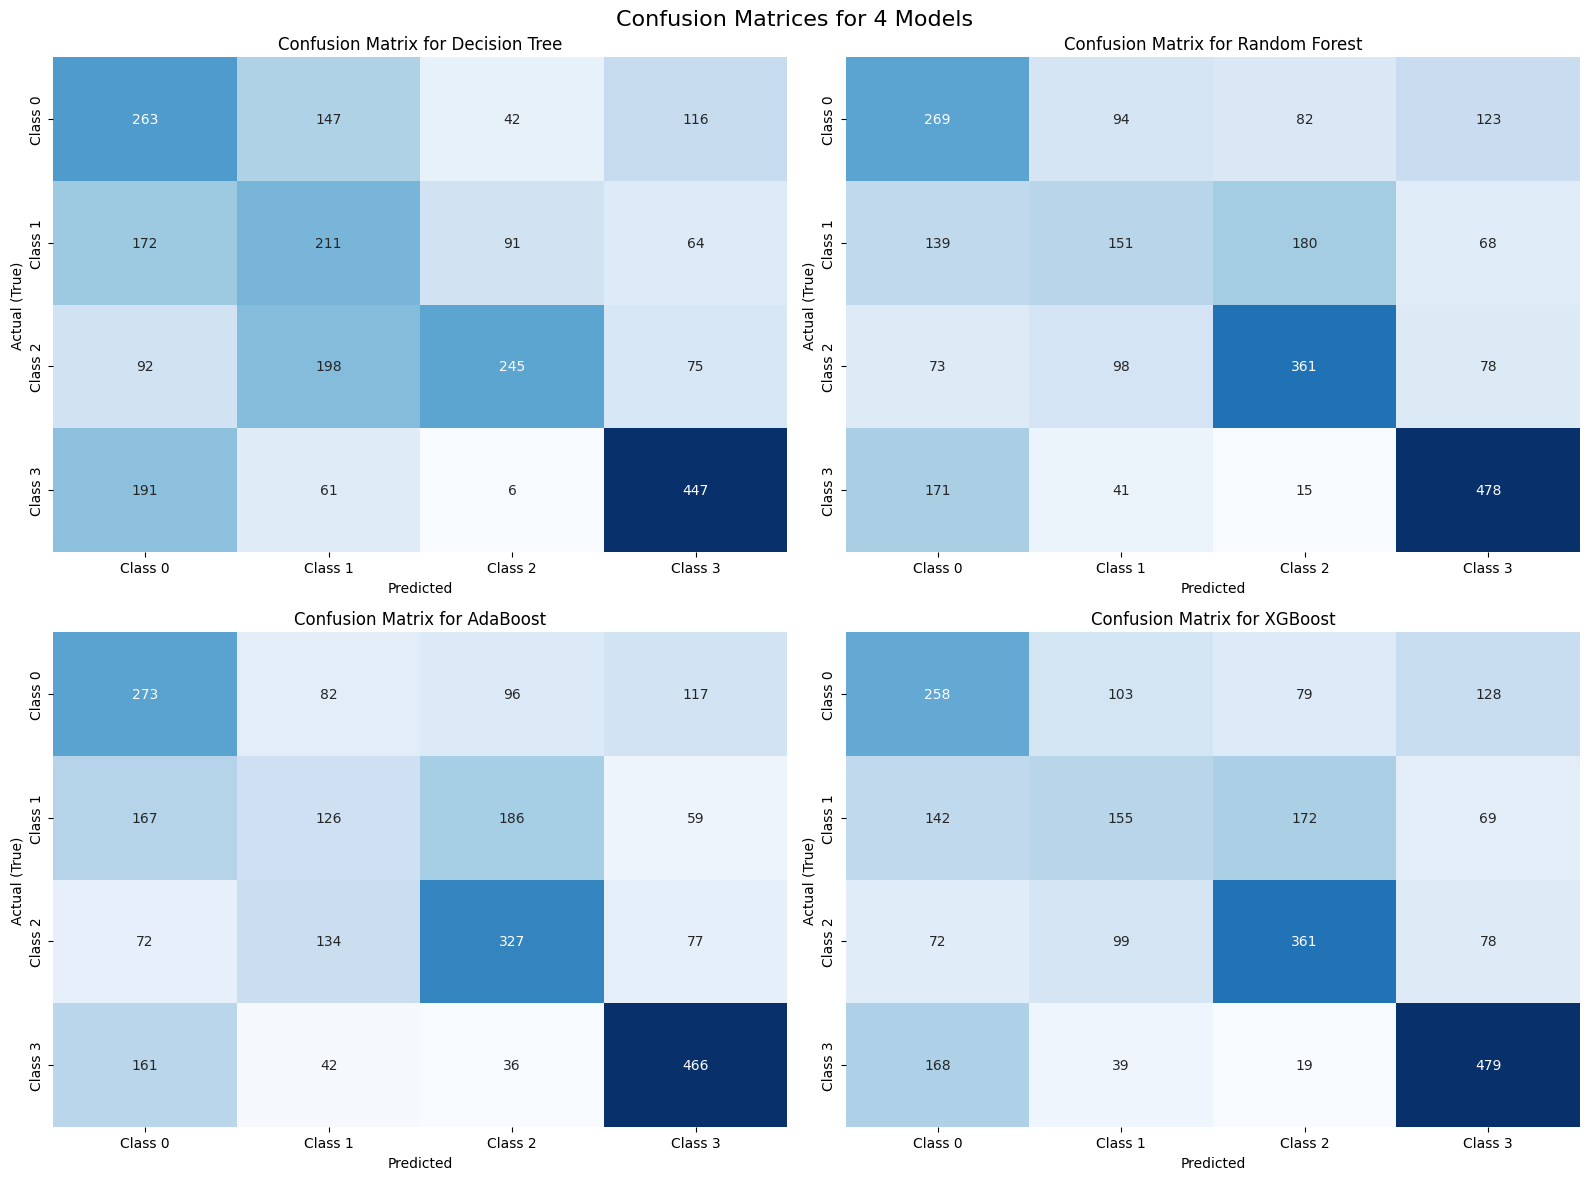

In [99]:
# Plot all confusion matrices on 1 plot
models = ["Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]
predictions = [dt_final_predict, rf_final_predict, ada_final_predict, xg_final_predict]
labels = ["Class 0", "Class 1", "Class 2", "Class 3"]

y_true = y_test

fig, axes = plt.subplots(nrows = 2, ncols  = 2, figsize = (16, 12))

for prediction, model, ax in zip(predictions, models, axes.flatten()):
  cm = confusion_matrix(y_true, prediction)
  sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", cbar = False, xticklabels = labels, yticklabels = labels, ax = ax)
  ax.set_title(f"Confusion Matrix for {model}")
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual (True)")

fig.suptitle("Confusion Matrices for 4 Models", fontsize = 16)

plt.tight_layout()
plt.show()

In [100]:
target_names = ["Class 0", "Class 1", "Class 2", "Class 3"]
print(classification_report(y_test, dt_final_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.37      0.46      0.41       568
     Class 1       0.34      0.39      0.37       538
     Class 2       0.64      0.40      0.49       610
     Class 3       0.64      0.63      0.64       705

    accuracy                           0.48      2421
   macro avg       0.50      0.47      0.48      2421
weighted avg       0.51      0.48      0.49      2421



In [101]:
print(classification_report(y_test, rf_final_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.41      0.47      0.44       568
     Class 1       0.39      0.28      0.33       538
     Class 2       0.57      0.59      0.58       610
     Class 3       0.64      0.68      0.66       705

    accuracy                           0.52      2421
   macro avg       0.50      0.51      0.50      2421
weighted avg       0.51      0.52      0.51      2421



In [102]:
print(classification_report(y_test, ada_final_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.41      0.48      0.44       568
     Class 1       0.33      0.23      0.27       538
     Class 2       0.51      0.54      0.52       610
     Class 3       0.65      0.66      0.65       705

    accuracy                           0.49      2421
   macro avg       0.47      0.48      0.47      2421
weighted avg       0.48      0.49      0.49      2421



In [103]:
print(classification_report(y_test, xg_final_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.40      0.45      0.43       568
     Class 1       0.39      0.29      0.33       538
     Class 2       0.57      0.59      0.58       610
     Class 3       0.64      0.68      0.66       705

    accuracy                           0.52      2421
   macro avg       0.50      0.50      0.50      2421
weighted avg       0.51      0.52      0.51      2421



In [104]:
model_names = ["Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]
predictions = [dt_initial_predict, rf_initial_predict, ada_initial_predict, xg_initial_predict]

y_true = y_test

accuracy_list = []
precision_micro_list = []
precision_macro_list = []
recall_micro_list = []
recall_macro_list = []
f1_micro_list = []
f1_macro_list = []

for prediction in predictions:
  # Accuracy
  accuracy = accuracy_score(y_true, prediction)
  accuracy_list.append(accuracy)

  # Precision
  precision_micro = precision_score(y_true, prediction, average = "micro")
  precision_macro = precision_score(y_true, prediction, average = "macro")
  precision_micro_list.append(precision_micro)
  precision_macro_list.append(precision_macro)

  # Recall
  recall_micro = recall_score(y_true, prediction, average = "micro")
  recall_macro = recall_score(y_true, prediction, average = "macro")
  recall_micro_list.append(recall_micro)
  recall_macro_list.append(recall_macro)

  # F1-Score
  f1_micro = f1_score(y_true, prediction, average='micro')
  f1_macro = f1_score(y_true, prediction, average='macro')
  f1_micro_list.append(f1_micro)
  f1_macro_list.append(f1_macro)

data_initial = {
    'Model': model_names,
    'Accuracy': accuracy_list,
    'Precision (Micro)': precision_micro_list,
    'Precision (Macro)': precision_macro_list,
    'Recall (Micro)': recall_micro_list,
    'Recall (Macro)': recall_macro_list,
    'F1 Score (Micro)': f1_micro_list,
    'F1 Score (Macro)': f1_macro_list
}

evaluation_metrics_initial = pd.DataFrame(data_initial)

In [105]:
evaluation_metrics_initial

Model  Accuracy  Precision (Micro)  Precision (Macro)  \
0  Decision Tree  0.410161           0.410161           0.407568   
1  Random Forest  0.464684           0.464684           0.449893   
2       AdaBoost  0.498554           0.498554           0.477105   
3        XGBoost  0.491532           0.491532           0.478421   

   Recall (Micro)  Recall (Macro)  F1 Score (Micro)  F1 Score (Macro)  
0        0.410161        0.399824          0.410161          0.402916  
1        0.464684        0.451652          0.464684          0.450429  
2        0.498554        0.483773          0.498554          0.477126  
3        0.491532        0.479954          0.491532          0.478491

In [106]:
for column in evaluation_metrics_initial.columns:
  if column != "Model":
    max_value = np.round(np.max(evaluation_metrics_initial[column]), 6)
    model_with_max_value = evaluation_metrics_initial.loc[evaluation_metrics_initial[column].idxmax()]["Model"]
    print(f"Maximum Value in {column} Column: {max_value} \n(Model: {model_with_max_value})")

Maximum Value in Accuracy Column: 0.498554 
(Model: AdaBoost)
Maximum Value in Precision (Micro) Column: 0.498554 
(Model: AdaBoost)
Maximum Value in Precision (Macro) Column: 0.478421 
(Model: XGBoost)
Maximum Value in Recall (Micro) Column: 0.498554 
(Model: AdaBoost)
Maximum Value in Recall (Macro) Column: 0.483773 
(Model: AdaBoost)
Maximum Value in F1 Score (Micro) Column: 0.498554 
(Model: AdaBoost)
Maximum Value in F1 Score (Macro) Column: 0.478491 
(Model: XGBoost)


In [107]:
model_names = ["Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]
predictions = [dt_final_predict, rf_final_predict, ada_final_predict, xg_final_predict]

y_true = y_test

accuracy_list = []
precision_micro_list = []
precision_macro_list = []
recall_micro_list = []
recall_macro_list = []
f1_micro_list = []
f1_macro_list = []

for prediction in predictions:
  # Accuracy
  accuracy = accuracy_score(y_true, prediction)
  accuracy_list.append(accuracy)

  # Precision
  precision_micro = precision_score(y_true, prediction, average = "micro")
  precision_macro = precision_score(y_true, prediction, average = "macro")
  precision_micro_list.append(precision_micro)
  precision_macro_list.append(precision_macro)

  # Recall
  recall_micro = recall_score(y_true, prediction, average = "micro")
  recall_macro = recall_score(y_true, prediction, average = "macro")
  recall_micro_list.append(recall_micro)
  recall_macro_list.append(recall_macro)

  # F1-Score
  f1_micro = f1_score(y_true, prediction, average='micro')
  f1_macro = f1_score(y_true, prediction, average='macro')
  f1_micro_list.append(f1_micro)
  f1_macro_list.append(f1_macro)

data_final = {
    'Model': model_names,
    'Accuracy': accuracy_list,
    'Precision (Micro)': precision_micro_list,
    'Precision (Macro)': precision_macro_list,
    'Recall (Micro)': recall_micro_list,
    'Recall (Macro)': recall_macro_list,
    'F1 Score (Micro)': f1_micro_list,
    'F1 Score (Macro)': f1_macro_list
}

evaluation_metrics_final = pd.DataFrame(data_final)

In [108]:
evaluation_metrics_final

Model  Accuracy  Precision (Micro)  Precision (Macro)  \
0  Decision Tree  0.481619           0.481619           0.495761   
1  Random Forest  0.520033           0.520033           0.502882   
2       AdaBoost  0.492359           0.492359           0.472218   
3        XGBoost  0.517555           0.517555           0.500481   

   Recall (Micro)  Recall (Macro)  F1 Score (Micro)  F1 Score (Macro)  
0        0.481619        0.472726          0.481619          0.475685  
1        0.520033        0.506020          0.520033          0.501365  
2        0.492359        0.477973          0.492359          0.472224  
3        0.517555        0.503391          0.517555          0.499365

In [109]:
for column in evaluation_metrics_final.columns:
  if column != "Model":
    max_value = np.round(np.max(evaluation_metrics_final[column]), 6)
    model_with_max_value = evaluation_metrics_final.loc[evaluation_metrics_final[column].idxmax()]["Model"]
    print(f"Maximum Value in {column} Column: {max_value} \n(Model: {model_with_max_value})")

Maximum Value in Accuracy Column: 0.520033 
(Model: Random Forest)
Maximum Value in Precision (Micro) Column: 0.520033 
(Model: Random Forest)
Maximum Value in Precision (Macro) Column: 0.502882 
(Model: Random Forest)
Maximum Value in Recall (Micro) Column: 0.520033 
(Model: Random Forest)
Maximum Value in Recall (Macro) Column: 0.50602 
(Model: Random Forest)
Maximum Value in F1 Score (Micro) Column: 0.520033 
(Model: Random Forest)
Maximum Value in F1 Score (Macro) Column: 0.501365 
(Model: Random Forest)


In [110]:
# Calculate AUC for ROC
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    # Create a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}

    for per_class in unique_class:
        # Create a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        # Mark the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Use the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [111]:
dt_roc_auc_dict = roc_auc_score_multiclass(y_test.tolist(), dt_final_predict.tolist())
dt_roc_auc_dict

{0: 0.6087402043127627,
 1: 0.5882899628252788,
 2: 0.6624430846104407,
 3: 0.7427205772950455}

In [112]:
rf_roc_auc_dict = roc_auc_score_multiclass(y_test.tolist(), rf_final_predict.tolist())
rf_roc_auc_dict

{0: 0.6334498491217135,
 1: 0.5784652150823155,
 2: 0.7194245548605516,
 3: 0.7606271388186281}

In [113]:
ada_roc_auc_dict = roc_auc_score_multiclass(y_test.tolist(), ada_final_predict.tolist())
ada_roc_auc_dict

{0: 0.6323838199189742,
 1: 0.5485926712692512,
 2: 0.6802359895357152,
 3: 0.7567785051827604}

In [114]:
xg_roc_auc_dict = roc_auc_score_multiclass(y_test.tolist(), xg_final_predict.tolist())
xg_roc_auc_dict

{0: 0.624036583233888,
 1: 0.5800584174190121,
 2: 0.7213571887644721,
 3: 0.7595881069285325}

In [115]:
roc_auc = {
    "Decision Tree": {0: 0.6087402043127627, 1: 0.5882899628252788, 2: 0.6624430846104407, 3: 0.7427205772950455},
    "Random Forest": {0: 0.6334498491217135, 1: 0.5784652150823155, 2: 0.7194245548605516, 3: 0.7606271388186281},
    "AdaBoost": {0: 0.6323838199189742, 1: 0.5485926712692512, 2: 0.6802359895357152, 3: 0.7567785051827604},
    "XGBoost": {0: 0.624036583233888, 1: 0.5800584174190121, 2: 0.7213571887644721, 3: 0.7595881069285325}
}

roc_auc_scores = pd.DataFrame(roc_auc)

In [116]:
roc_auc_scores = roc_auc_scores.transpose().reset_index()

In [117]:
roc_auc_scores.columns = ["Model", "Class 0", "Class 1", "Class 2", "Class 3"]

In [118]:
roc_auc_scores

Model   Class 0   Class 1   Class 2   Class 3
0  Decision Tree  0.608740  0.588290  0.662443  0.742721
1  Random Forest  0.633450  0.578465  0.719425  0.760627
2       AdaBoost  0.632384  0.548593  0.680236  0.756779
3        XGBoost  0.624037  0.580058  0.721357  0.759588

In [119]:
for column in roc_auc_scores.columns:
  if column != "Model":
    max_score = np.round(np.max(roc_auc_scores[column]), 7)
    model_with_max_score = roc_auc_scores.loc[roc_auc_scores[column].idxmax()]["Model"]
    print(f"Maximum Value in {column}: {max_score} \n(Model: {model_with_max_score})")

Maximum Value in Class 0: 0.6334498 
(Model: Random Forest)
Maximum Value in Class 1: 0.58829 
(Model: Decision Tree)
Maximum Value in Class 2: 0.7213572 
(Model: XGBoost)
Maximum Value in Class 3: 0.7606271 
(Model: Random Forest)


In [120]:
# Calculate AUC for Precision-Recall
def pr_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    # Create a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    pr_auc_dict = {}
    for per_class in unique_class:
        # Create a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        # Mark the current class as 1 and all other classes as 0
        new_actual_class = [1 if x == per_class else 0 for x in actual_class]
        new_pred_class = [1 if x == per_class else 0 for x in pred_class]

        # Use the sklearn metrics method to calculate the precision-recall curve and AUC
        precision, recall, _ = precision_recall_curve(new_actual_class, new_pred_class)
        pr_auc = auc(recall, precision)
        pr_auc_dict[per_class] = pr_auc

    return pr_auc_dict

In [121]:
dt_pr_auc_dict = pr_auc_score_multiclass(y_test.tolist(), dt_final_predict.tolist(), average = "macro")
dt_pr_auc_dict

{0: 0.4776522166124938,
 1: 0.43461938588404947,
 2: 0.5952121623211517,
 3: 0.688681112010227}

In [122]:
rf_pr_auc_dict = pr_auc_score_multiclass(y_test.tolist(), rf_final_predict.tolist(), average = "macro")
rf_pr_auc_dict

{0: 0.504835460626657,
 1: 0.4168748063816604,
 2: 0.630242030824764,
 3: 0.7058349986198055}

In [123]:
ada_pr_auc_dict = pr_auc_score_multiclass(y_test.tolist(), ada_final_predict.tolist(), average = "macro")
ada_pr_auc_dict

{0: 0.50406531870559,
 1: 0.36625167802560926,
 2: 0.5799680817374595,
 3: 0.7039174186970354}

In [124]:
xg_pr_auc_dict = pr_auc_score_multiclass(y_test.tolist(), xg_final_predict.tolist(), average = "macro")
xg_pr_auc_dict

{0: 0.4926983069939671,
 1: 0.4188586609590327,
 2: 0.6333805530490286,
 3: 0.7040304970669873}

In [125]:
pr_auc = {
    "Decision Tree": {0: 0.4776522166124938, 1: 0.43461938588404947, 2: 0.5952121623211517, 3: 0.688681112010227},
    "Random Forest": {0: 0.504835460626657, 1: 0.4168748063816604, 2: 0.630242030824764, 3: 0.7058349986198055},
    "AdaBoost": {0: 0.50406531870559, 1: 0.36625167802560926, 2: 0.5799680817374595, 3: 0.7039174186970354},
    "XGBoost": {0: 0.4926983069939671, 1: 0.4188586609590327, 2: 0.6333805530490286, 3: 0.7040304970669873}
}

pr_auc_scores = pd.DataFrame(pr_auc)

In [126]:
pr_auc_scores = pr_auc_scores.transpose().reset_index()

In [127]:
pr_auc_scores.columns = ["Model", "Class 0", "Class 1", "Class 2", "Class 3"]

In [128]:
pr_auc_scores

Model   Class 0   Class 1   Class 2   Class 3
0  Decision Tree  0.477652  0.434619  0.595212  0.688681
1  Random Forest  0.504835  0.416875  0.630242  0.705835
2       AdaBoost  0.504065  0.366252  0.579968  0.703917
3        XGBoost  0.492698  0.418859  0.633381  0.704030

In [129]:
for column in pr_auc_scores.columns:
  if column != "Model":
    max_score = np.round(np.max(pr_auc_scores[column]), 7)
    model_with_max_score = pr_auc_scores.loc[pr_auc_scores[column].idxmax()]["Model"]
    print(f"Maximum Value in {column}: {max_score} \n(Model: {model_with_max_score})")

Maximum Value in Class 0: 0.5048355 
(Model: Random Forest)
Maximum Value in Class 1: 0.4346194 
(Model: Decision Tree)
Maximum Value in Class 2: 0.6333806 
(Model: XGBoost)
Maximum Value in Class 3: 0.705835 
(Model: Random Forest)


### ROC Curve - One vs. Rest (OvR)

In [130]:
y_proba = rf_final.predict_proba(X_test)

In [131]:
classes = dt_final.classes_
classes

array([0, 1, 2, 3])

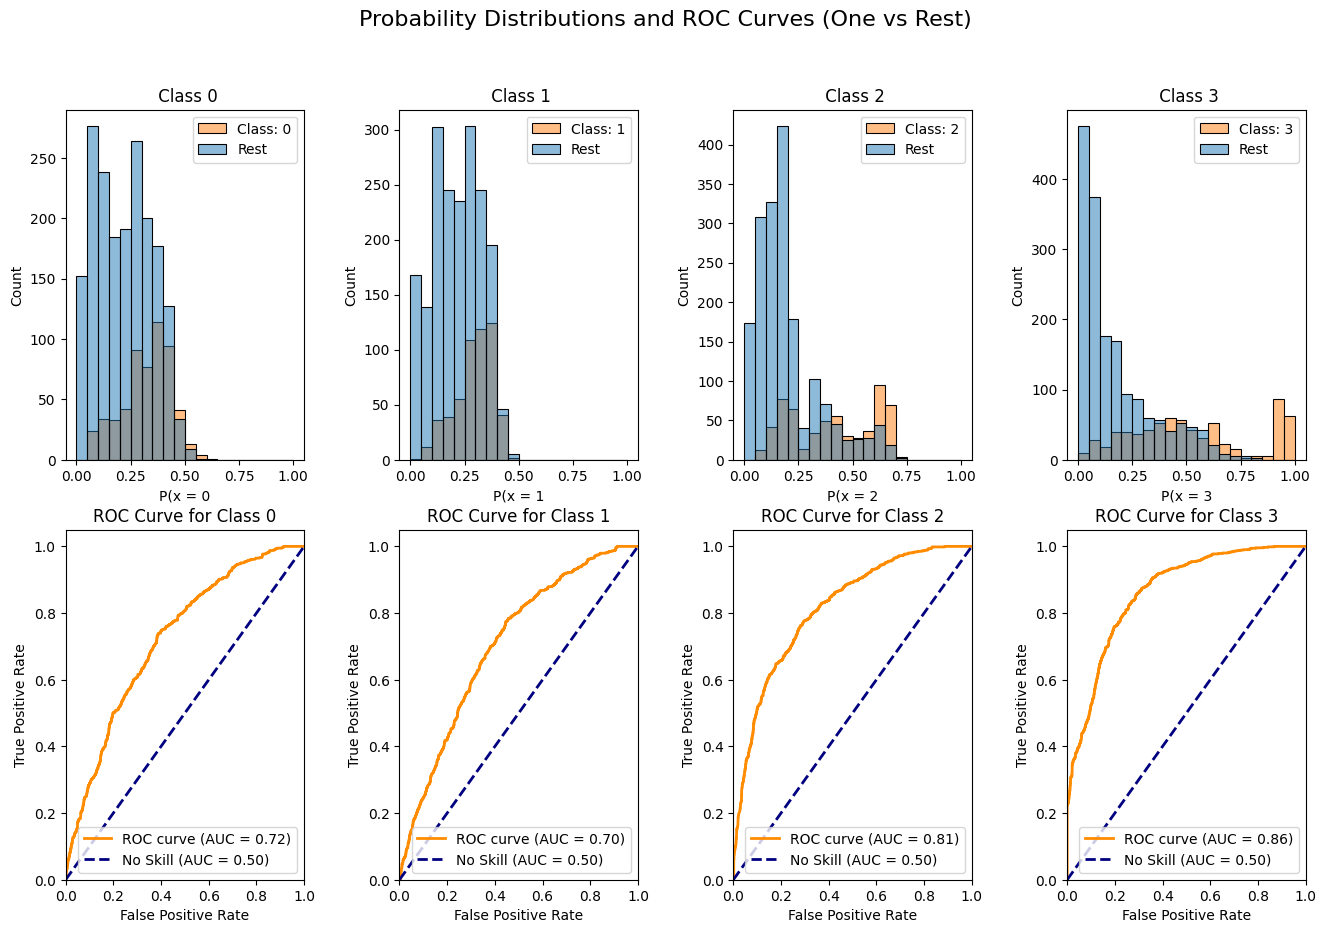

In [132]:
# Plot the Probability Distributions and the ROC Curves One vs Rest
# Create subplots
fig, axes = plt.subplots(nrows = 2, ncols = len(classes), figsize = (16, 10))
plt.subplots_adjust(wspace=0.4)

# Define bins for probability distribution
bins = [i / 20 for i in range(20)] + [1]

# Create a dictionary for the ROC AUC values
roc_auc_ovr = {}

for i, c in enumerate(classes):
    # Create an auxiliary DataFrame to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]

    # Plot the probability distribution for the class and the rest
    ax1 = axes[0, i]
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax1, bins = bins)
    ax1.set_xlabel(f"P(x = {c}")
    ax1.set_title(f" Class {c}")
    ax1.legend([f"Class: {c}", "Rest"])

    # Calculate the ROC coordinates and plot the ROC curve
    ax2 = axes[1, i]
    fpr, tpr, _ = roc_curve(df_aux["class"], df_aux["prob"])
    roc_auc = roc_auc_score(df_aux["class"], df_aux["prob"])

    ax2.plot(fpr, tpr, color = "darkorange", lw = 2, label = f"ROC curve (AUC = {roc_auc:.2f})")

    # Plot the "no skill" line with a label
    no_skill_fpr = [0, 1]
    no_skill_tpr = [0, 1]
    ax2.plot(no_skill_fpr, no_skill_tpr, color = "navy", lw = 2, linestyle='--', label = "No Skill (AUC = 0.50)")

    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel("False Positive Rate")
    ax2.set_ylabel("True Positive Rate")
    ax2.set_title(f"ROC Curve for Class {c}")
    ax2.legend(loc = "lower right")

    # Store the ROC AUC value in the dictionary
    roc_auc_ovr[c] = roc_auc

plt.suptitle("Probability Distributions and ROC Curves (One vs Rest)", fontsize = 16)
plt.show()

In [133]:
# Display the ROC AUC for each class
avg_roc_auc = np.mean(list(roc_auc_ovr.values()))
for k in roc_auc_ovr:
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc:.4f}")

0 ROC AUC OvR: 0.7218
1 ROC AUC OvR: 0.7049
2 ROC AUC OvR: 0.8146
3 ROC AUC OvR: 0.8619
Average ROC AUC OvR: 0.7758


In [134]:
# Compare with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = "macro")

0.775778759157706

### ROC Curve - One vs. One (OvO)

In [135]:
# Compare each possible combination of the classes, two at a time
classes_combinations = []
class_list = list(classes)

for i in range(len(class_list)):
    for j in range(i + 1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])

classes_combinations

[[0, 1],
 [1, 0],
 [0, 2],
 [2, 0],
 [0, 3],
 [3, 0],
 [1, 2],
 [2, 1],
 [1, 3],
 [3, 1],
 [2, 3],
 [3, 2]]

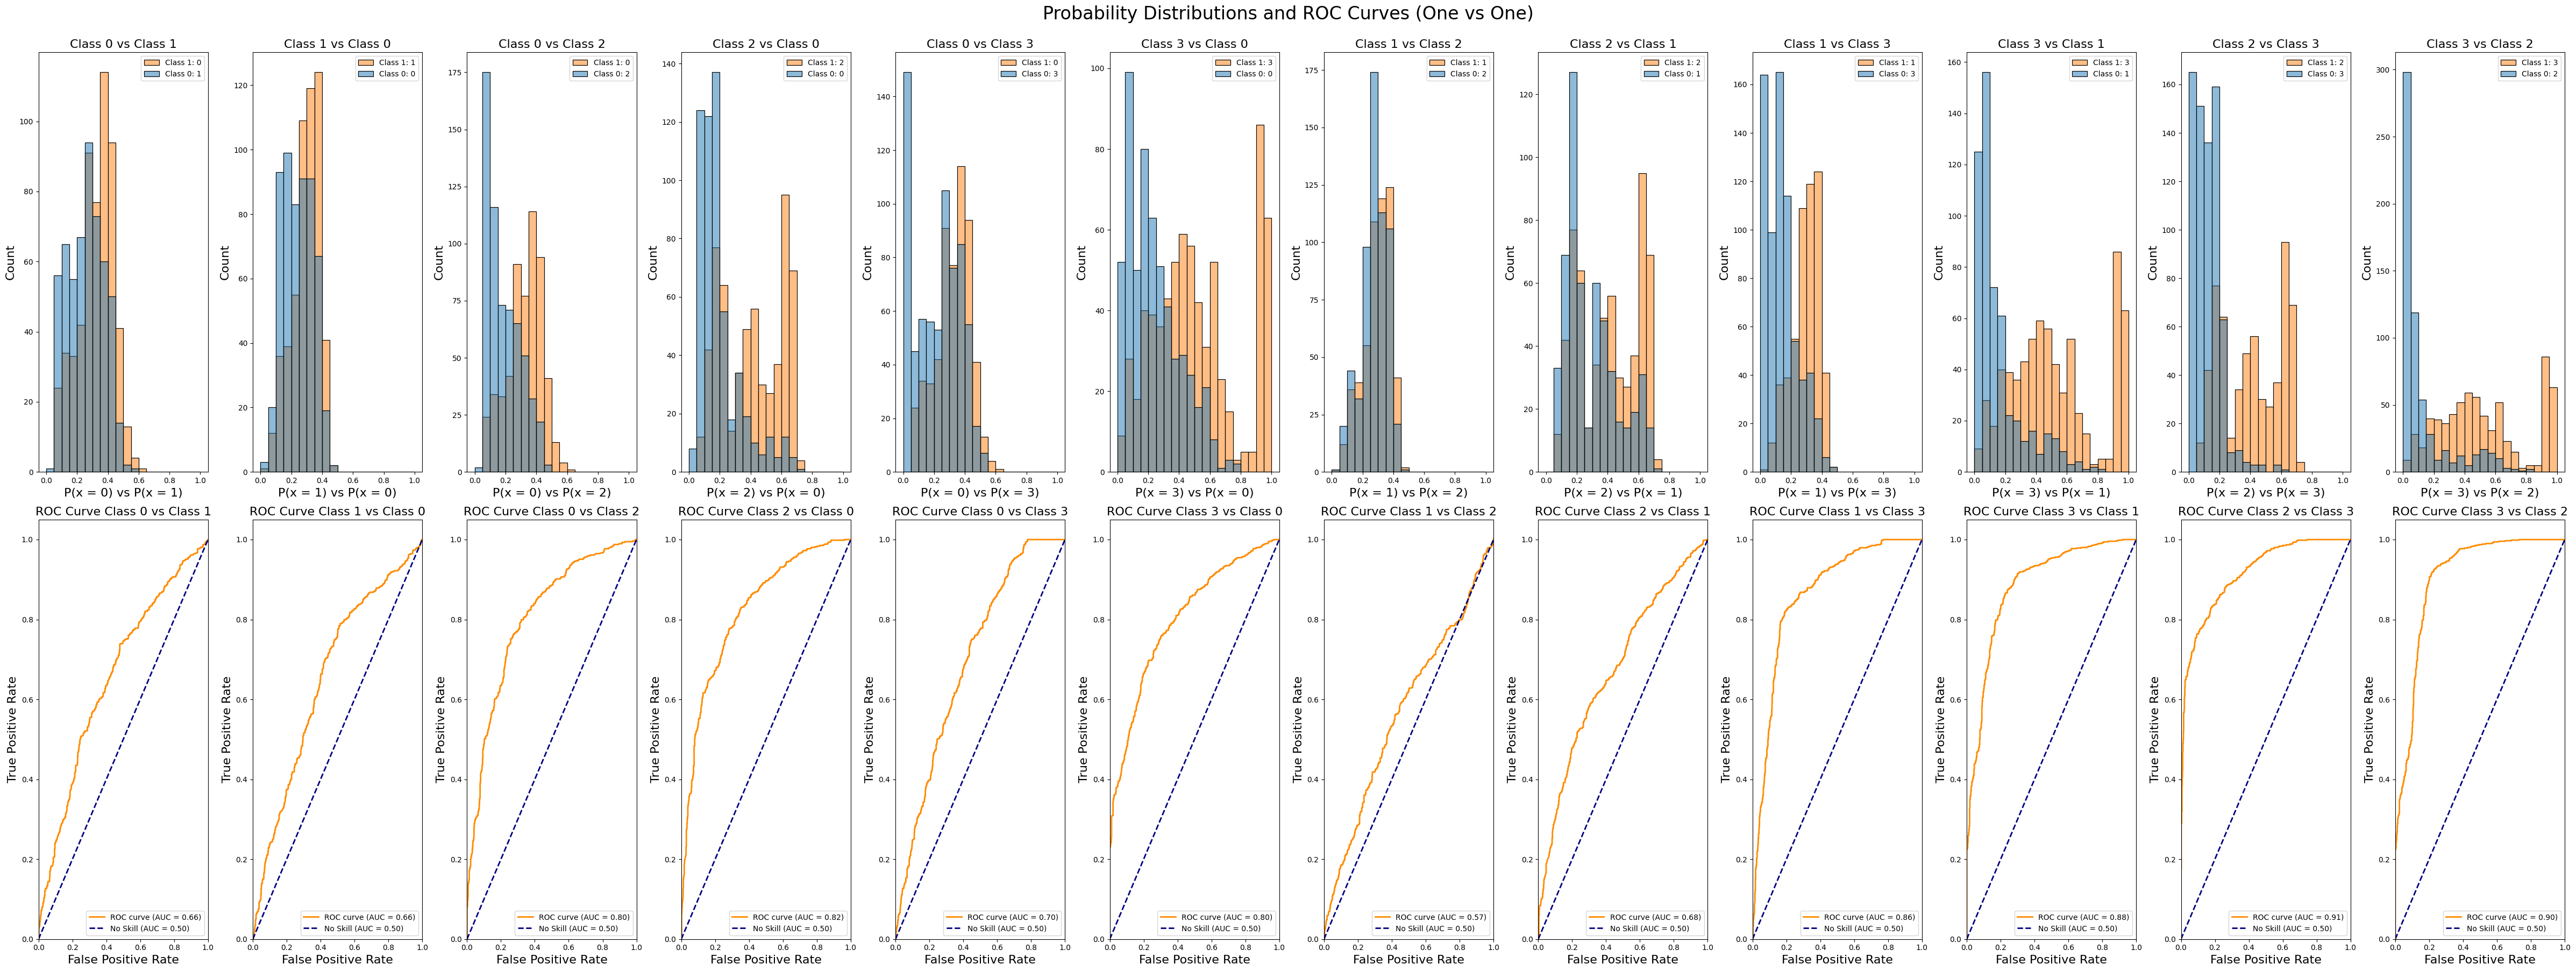

In [136]:
# Plot the Probability Distributions and the ROC Curves One vs One
fig, axes = plt.subplots(nrows=2, ncols = len(classes_combinations), figsize = (48, 18))
plt.subplots_adjust(wspace = 0.2)

# Define bins for probability distribution
bins = [i / 20 for i in range(20)] + [1]

# Create a dictionary for the ROC AUC values
roc_auc_ovo = {}

for i, comb in enumerate(classes_combinations):
    # Get the class
    c1, c2 = comb
    c1_index = class_list.index(c1)
    c2_index = class_list.index(c2)
    title = f"Class {c1} vs Class {c2}"

    # Prepare an auxiliary dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux["class"] = y_test
    df_aux["prob"] = y_proba[:, c1_index]

    # Filter only the subset with both classes
    df_aux = df_aux[(df_aux["class"] == c1) | (df_aux["class"] == c2)]
    df_aux["class"] = [1 if y == c1 else 0 for y in df_aux["class"]]
    df_aux = df_aux.reset_index(drop = True)

    # Plot the probability distribution for the class and the rest
    ax1 = axes[0, i]
    sns.histplot(x = "prob", data = df_aux, hue = "class", color = "b", ax = ax1, bins = bins)
    ax1.set_xlabel(f"P(x = {c1}) vs P(x = {c2})", fontsize = 16)
    ax1.set_ylabel("Count", fontsize = 16)
    ax1.set_title(title, fontsize = 16)
    ax1.legend([f"Class 1: {c1}", f"Class 0: {c2}"])

    # Calculate the ROC Coordinates and plot the ROC Curves
    ax2 = axes[1, i]
    fpr, tpr, _ = roc_curve(df_aux["class"], df_aux["prob"])
    roc_auc = roc_auc_score(df_aux["class"], df_aux["prob"])

    ax2.plot(fpr, tpr, color = "darkorange", lw = 2, label = f"ROC curve (AUC = {roc_auc:.2f})")

    # Plot the "no skill" line with a label
    no_skill_fpr = [0, 1]
    no_skill_tpr = [0, 1]
    ax2.plot(no_skill_fpr, no_skill_tpr, color = "navy", lw = 2, linestyle= "--", label = "No Skill (AUC = 0.50)")

    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel("False Positive Rate", fontsize = 16)
    ax2.set_ylabel("True Positive Rate", fontsize = 16)
    ax2.set_title(f"ROC Curve Class {c1} vs Class {c2}", fontsize = 16)
    ax2.legend(loc = "lower right")

    # Store the ROC AUC value in the dictionary
    roc_auc_ovo[title] = roc_auc

plt.suptitle("Probability Distributions and ROC Curves (One vs One)", fontsize = 24, y = 1.0)
plt.tight_layout()
plt.show()

In [137]:
# Display the ROC AUC for each class
avg_roc_auc = np.mean(list(roc_auc_ovo.values()))
for k in roc_auc_ovo:
    print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.4f}")
print(f"Average ROC AUC OvO: {avg_roc_auc:.4f}")

Class 0 vs Class 1 ROC AUC OvO: 0.6588
Class 1 vs Class 0 ROC AUC OvO: 0.6566
Class 0 vs Class 2 ROC AUC OvO: 0.8042
Class 2 vs Class 0 ROC AUC OvO: 0.8206
Class 0 vs Class 3 ROC AUC OvO: 0.6985
Class 3 vs Class 0 ROC AUC OvO: 0.8004
Class 1 vs Class 2 ROC AUC OvO: 0.5707
Class 2 vs Class 1 ROC AUC OvO: 0.6773
Class 1 vs Class 3 ROC AUC OvO: 0.8598
Class 3 vs Class 1 ROC AUC OvO: 0.8829
Class 2 vs Class 3 ROC AUC OvO: 0.9146
Class 3 vs Class 2 ROC AUC OvO: 0.9006
Average ROC AUC OvO: 0.7704


In [138]:
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovo', average = "macro")

0.7704128810914287

### Precision-Recall Curve

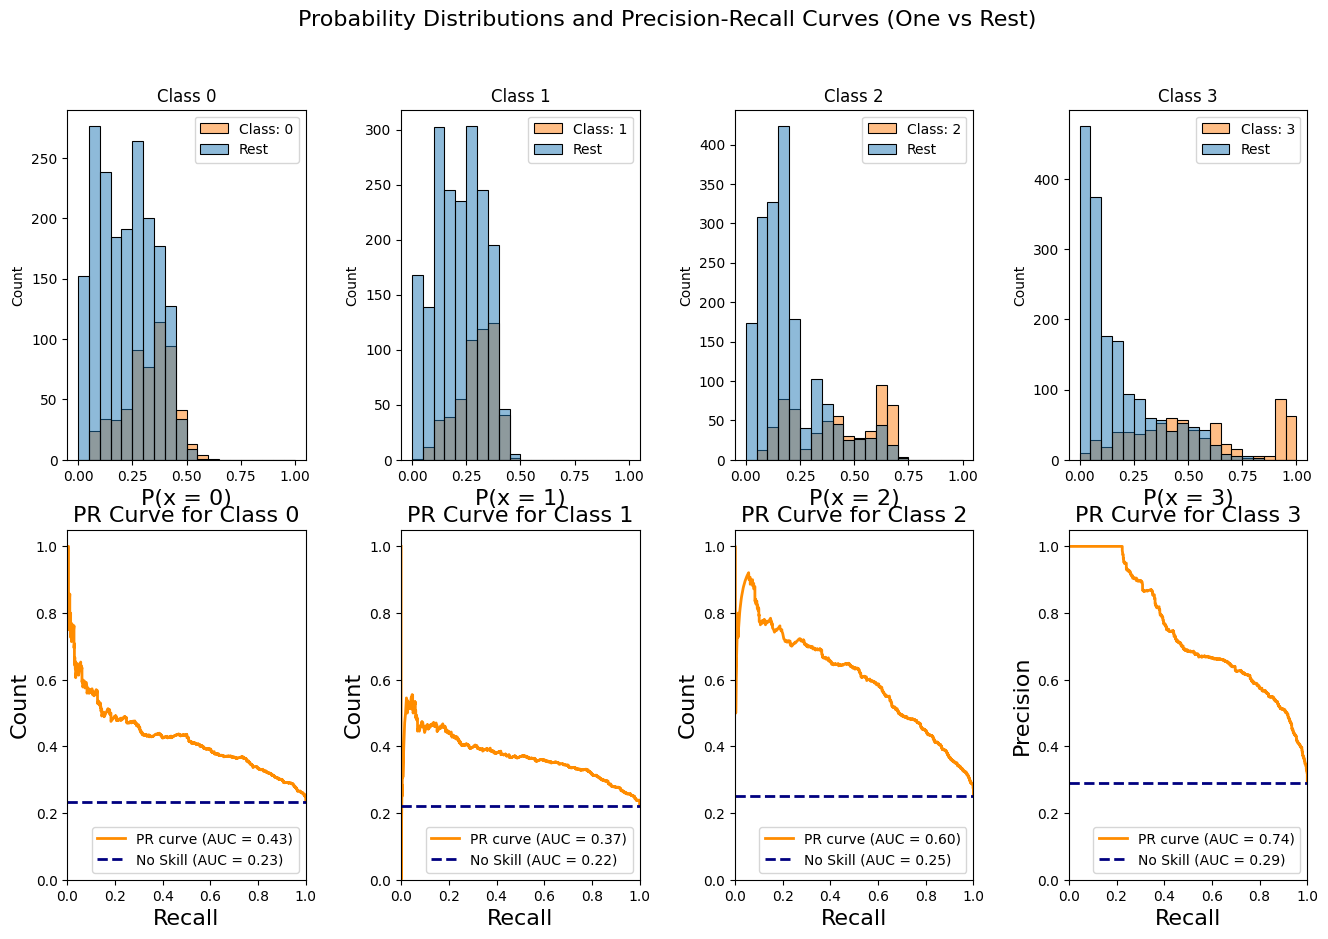

In [139]:
# Plot the Probability Distributions and the Precision-Recall Curves One vs Rest
# Create subplots
fig, axes = plt.subplots(nrows = 2, ncols = len(classes), figsize = (16, 10))
plt.subplots_adjust(wspace = 0.4)

# Define bins for probability distribution
bins = [i / 20 for i in range(20)] + [1]

# Create a dictionary for the precision-recall AUC values
pr_auc_ovr = {}

# Create a list to store AUC values for the "No Skill" line
no_skill_aucs = []

for i, c in enumerate(classes):
    # Create an auxiliary DataFrame to help with the plots
    df_aux = X_test.copy()
    df_aux["class"] = [1 if y == c else 0 for y in y_test]
    df_aux["prob"] = y_proba[:, i]

    # Plot the probability distribution for the class and the rest
    ax1 = axes[0, i]
    sns.histplot(x = "prob", data = df_aux, hue = "class", color = "b", ax = ax1, bins = bins)
    ax1.set_xlabel(f"P(x = {c})", fontsize = 16)
    ax2.set_ylabel("Count", fontsize = 16)
    ax1.set_title(f"Class {c}")
    ax1.legend([f"Class: {c}", "Rest"])

    # Calculate the precision-recall coordinates and plot the precision-recall curve
    ax2 = axes[1, i]
    precision, recall, _ = precision_recall_curve(df_aux["class"], df_aux["prob"])
    pr_auc = auc(recall, precision)

    ax2.plot(recall, precision, color = "darkorange", lw = 2, label = f"PR curve (AUC = {pr_auc:.2f})")

    # Calculate and store the "No Skill" AUC
    no_skill = len(df_aux[df_aux["class"] == 1]) / len(df_aux)
    no_skill_auc = auc([0, 1], [no_skill, no_skill])
    no_skill_aucs.append(no_skill_auc)

    # Plot the "no skill" line
    ax2.axhline(y = no_skill, color = "navy", lw = 2, linestyle = "--", label = f"No Skill (AUC = {no_skill_auc:.2f})")

    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel("Recall", fontsize = 16)
    ax2.set_ylabel("Precision", fontsize = 16)
    ax2.set_title(f"PR Curve for Class {c}", fontsize = 16)
    ax2.legend(loc = "lower right")

    # Store the precision-recall AUC value in the dictionary
    pr_auc_ovr[c] = pr_auc

plt.suptitle("Probability Distributions and Precision-Recall Curves (One vs Rest)", fontsize = 16)
plt.show()

In [140]:
# Display the precision-recall AUC for each class
avg_pr_auc = np.mean(list(pr_auc_ovr.values()))
for k in pr_auc_ovr:
    print(f"{k} Precision-Recall AUC OvR: {pr_auc_ovr[k]:.4f}")
print(f"Average Precision-Recall AUC OvR: {avg_pr_auc:.4f}")

0 Precision-Recall AUC OvR: 0.4255
1 Precision-Recall AUC OvR: 0.3709
2 Precision-Recall AUC OvR: 0.6012
3 Precision-Recall AUC OvR: 0.7422
Average Precision-Recall AUC OvR: 0.5349


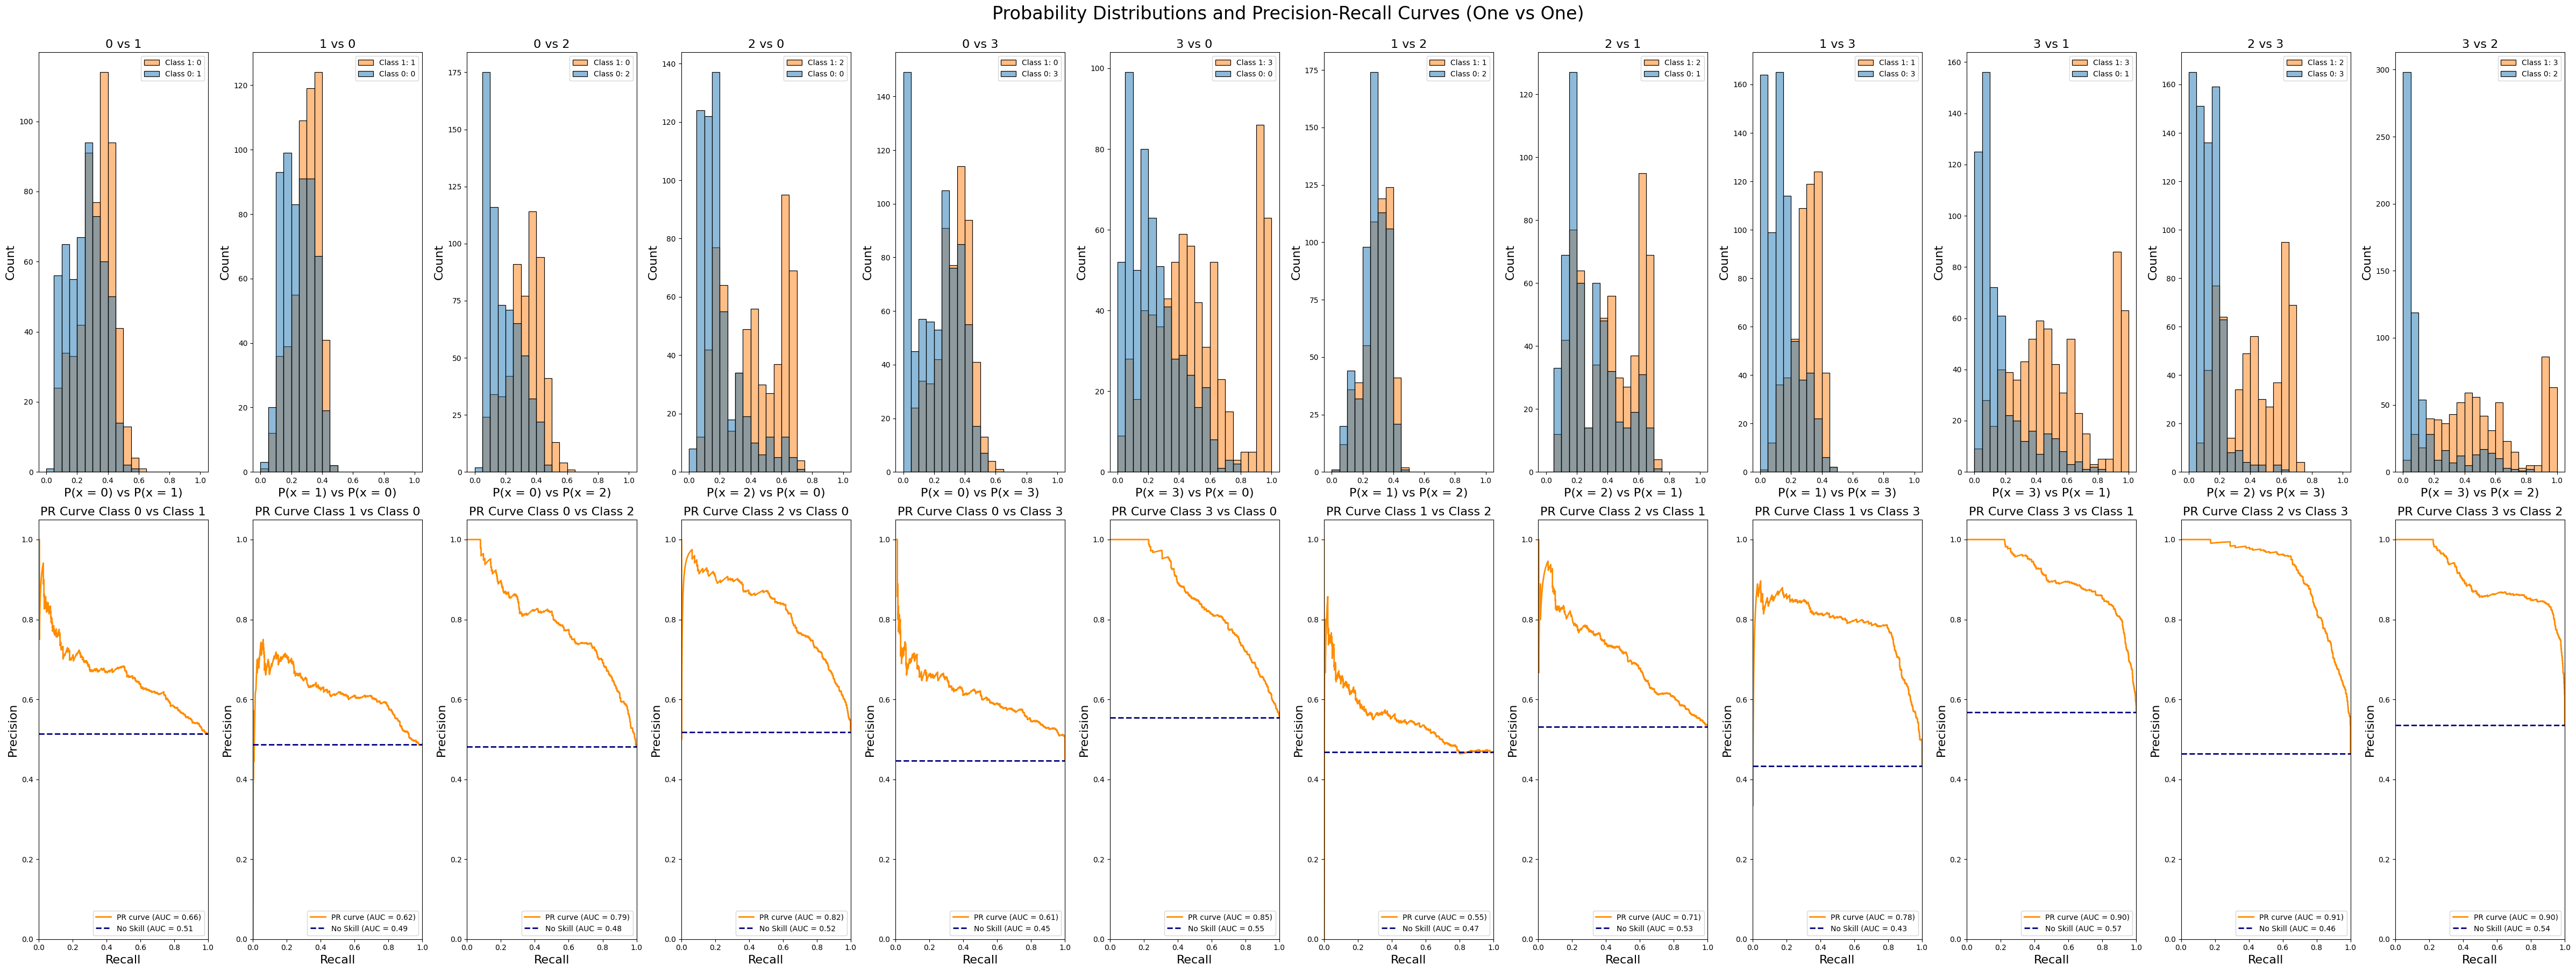

In [141]:
# Plot the Probability Distributions and the Precision-Recall Curves One vs One
# Create subplots
fig, axes = plt.subplots(nrows = 2, ncols = len(classes_combinations), figsize = (48, 18))
plt.subplots_adjust(wspace=0.2)

# Define bins for probability distribution
bins = [i / 20 for i in range(20)] + [1]

# Create a dictionary for the Precision-Recall AUC values
pr_auc_ovo = {}

# Create a list to store AUC values for the "No Skill" line
no_skill_aucs = []

for i, comb in enumerate(classes_combinations):
    # Get the class
    c1, c2 = comb
    c1_index = class_list.index(c1)
    c2_index = class_list.index(c2)
    title = f"{c1} vs {c2}"

    # Prepare an auxiliary dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux["class"] = y_test
    df_aux["prob"] = y_proba[:, c1_index]

    # Filter only the subset with both classes
    df_aux = df_aux[(df_aux["class"] == c1) | (df_aux["class"] == c2)]
    df_aux["class"] = [1 if y == c1 else 0 for y in df_aux["class"]]
    df_aux = df_aux.reset_index(drop = True)

    # Plot the probability distribution for the class and the rest
    ax1 = axes[0, i]
    sns.histplot(x = "prob", data = df_aux, hue = "class", color = "b", ax = ax1, bins = bins)
    ax1.set_xlabel(f"P(x = {c1}) vs P(x = {c2})", fontsize = 16)
    ax1.set_ylabel("Count", fontsize = 16)
    ax1.set_title(title, fontsize = 16)
    ax1.legend([f"Class 1: {c1}", f"Class 0: {c2}"])

    # Calculate the Precision-Recall coordinates and plot the Precision-Recall curve
    ax2 = axes[1, i]
    precision, recall, _ = precision_recall_curve(df_aux["class"], df_aux["prob"])
    pr_auc = auc(recall, precision)

    ax2.plot(recall, precision, color = "darkorange", lw = 2, label = f"PR curve (AUC = {pr_auc:.2f})")

    # Calculate and store the "No Skill" AUC
    no_skill_precision = len(df_aux[df_aux['class'] == 1]) / len(df_aux)
    no_skill_auc = auc([0, 1], [no_skill_precision, no_skill_precision])

    # Plot the "no skill" line with a label
    ax2.axhline(y = no_skill_precision, color = "navy", lw = 2, linestyle = "--", label = f"No Skill (AUC = {no_skill_auc:.2f}")

    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall', fontsize = 16)
    ax2.set_ylabel('Precision', fontsize = 16)
    ax2.set_title(f"PR Curve Class {c1} vs Class {c2}", fontsize = 16)
    ax2.legend(loc = "lower right")

    # Store the Precision-Recall AUC value in the dictionary
    pr_auc_ovo[title] = pr_auc

plt.suptitle("Probability Distributions and Precision-Recall Curves (One vs One)", fontsize = 24, y = 1.0)
plt.tight_layout()
plt.show()

In [142]:
# Display the Precision-Recall AUC for each class
avg_pr_auc = np.mean(list(pr_auc_ovo.values()))
for k in pr_auc_ovo:
    print(f"{k} Precision-Recall AUC OvO: {pr_auc_ovo[k]:.4f}")
print(f"Average Precision-Recall AUC OvO: {avg_pr_auc:.4f}")

0 vs 1 Precision-Recall AUC OvO: 0.6603
1 vs 0 Precision-Recall AUC OvO: 0.6153
0 vs 2 Precision-Recall AUC OvO: 0.7890
2 vs 0 Precision-Recall AUC OvO: 0.8206
0 vs 3 Precision-Recall AUC OvO: 0.6135
3 vs 0 Precision-Recall AUC OvO: 0.8483
1 vs 2 Precision-Recall AUC OvO: 0.5489
2 vs 1 Precision-Recall AUC OvO: 0.7077
1 vs 3 Precision-Recall AUC OvO: 0.7841
3 vs 1 Precision-Recall AUC OvO: 0.9042
2 vs 3 Precision-Recall AUC OvO: 0.9145
3 vs 2 Precision-Recall AUC OvO: 0.8985
Average Precision-Recall AUC OvO: 0.7587


### ROC and Precision-Recall Curves

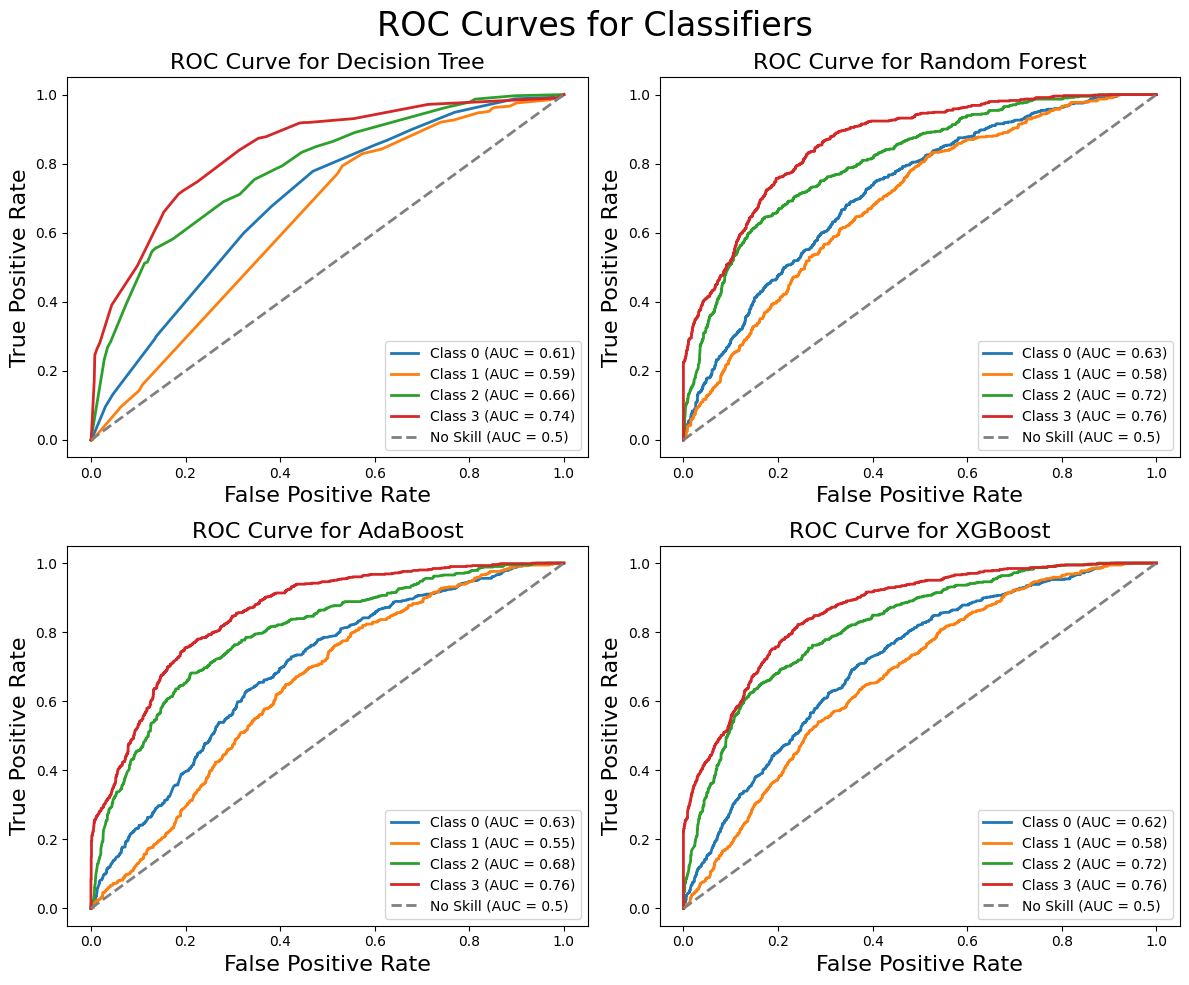

In [143]:
# Binarize the labels
n_classes = len(set(y))
Y = label_binarize(y, classes=[*range(n_classes)])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

classifiers = [
    DecisionTreeClassifier(criterion = "entropy", max_depth = 5, max_features = 6, random_state = 101),
    RandomForestClassifier(max_depth = 7, max_features = 2, n_estimators = 90, random_state = 101),
    AdaBoostClassifier(learning_rate = 0.15, n_estimators = 500, random_state = 101),
    XGBClassifier(learning_rate = 0.2, max_depth = 3, n_estimators = 50, random_state = 101)
]

classifier_names = ["Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]

# Create subplots for ROC Curves
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))

for i, clf in enumerate(classifiers):
    # Fit the classifier
    clf = OneVsRestClassifier(clf)
    clf.fit(X_train, y_train)

    # Get class probabilities
    y_proba = clf.predict_proba(X_test)

    # Calculate ROC curve for each class
    fpr = {}
    tpr = {}
    # roc_auc = {}

    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_proba[:, j])
        # roc_auc[j] = auc(fpr[j], tpr[j])

    # Plot ROC curve in corresponding subplot
    ax = axes[i // 2, i % 2]
    for j in range(n_classes):
      auc = roc_auc_scores.loc[i, f"Class {chr(ord('0') + j)}"]
      ax.plot(fpr[j], tpr[j], lw = 2, label = "Class {} (AUC = {:.2f})".format(j, auc))

    # Add a "no-skill" line
    ax.plot([0, 1], [0, 1], linestyle = "--", color = "gray", lw = 2, label = "No Skill (AUC = 0.5)")

    ax.set_xlabel("False Positive Rate", fontsize = 16)
    ax.set_ylabel("True Positive Rate", fontsize = 16)
    ax.set_title("ROC Curve for {}".format(classifier_names[i]), fontsize = 16)
    ax.legend(loc = "best")

# Adjust subplot layout
plt.suptitle("ROC Curves for Classifiers", fontsize = 24)
plt.tight_layout()
plt.show()

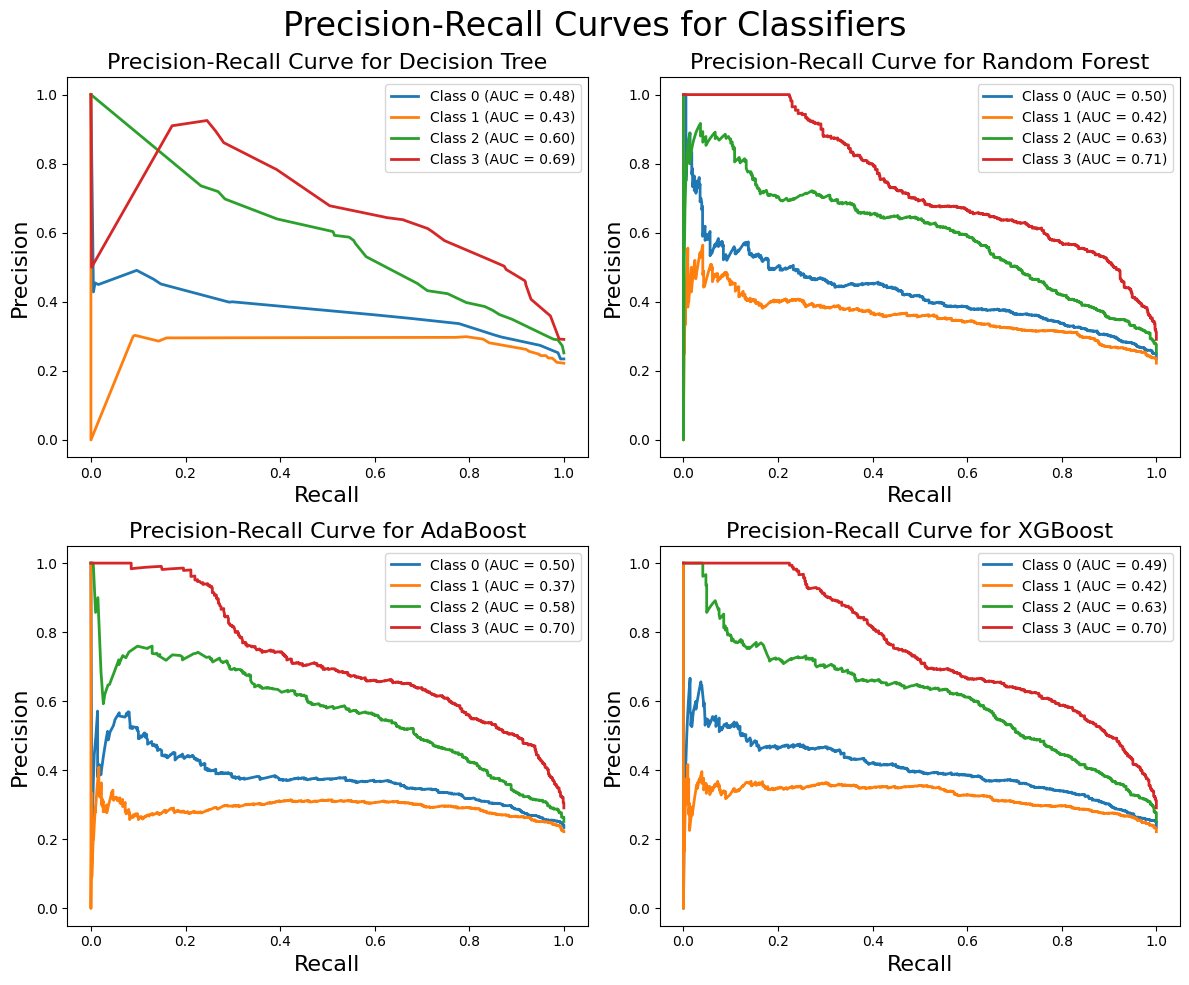

In [144]:
# Create subplots for Precision-Recall Curves
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))

classifier_names = ["Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]

for i, clf in enumerate(classifiers):
    # Fit the classifier
    clf = OneVsRestClassifier(clf)
    clf.fit(X_train, y_train)

    # Get class probabilities
    y_proba = clf.predict_proba(X_test)

    # Calculate Precision-Recall curve for each class
    precision = {}
    recall = {}

    for j in range(n_classes):
        precision[j], recall[j], _ = precision_recall_curve(y_test[:, j], y_proba[:, j])

    # Plot Precision-Recall curve in the corresponding subplot
    ax = axes[i // 2, i % 2]
    for j in range(n_classes):
        auc = pr_auc_scores.loc[i, f"Class {chr(ord('0') + j)}"]
        ax.plot(recall[j], precision[j], lw = 2, label = "Class {} (AUC = {:.2f})".format(j, auc))

    ax.set_xlabel("Recall", fontsize = 16)
    ax.set_ylabel("Precision", fontsize = 16)
    ax.set_title("Precision-Recall Curve for {}".format(classifier_names[i]), fontsize = 16)
    ax.legend(loc = "best")

# Adjust subplot layout
plt.suptitle("Precision-Recall Curves for Classifiers", fontsize = 24)
plt.tight_layout()
plt.show()